<div style="width:50%; background-color: #3498db; color: white; padding: 10px; font-size: 16px; font-weight: bold; text-align: justify; border-radius: 10px;" id="0">
    <h2 style="font-size: 22px; font-weight: bold; text-align: justify;"><u>Table of Contents</u></h2>
    <ol>
        <li><a href="#1" style="color: white;">Imports and Loading data</a></li>
        <li><a href="#2" style="color: white;">First look at the data</a>
            <ol>
                <li><a href="#21" style="color: white;">Provided Train Dataset</a></li>
                <li><a href="#22" style="color: white;">Original Dataset</a></li>
                <li><a href="#23" style="color: white;">Dataset Integration</a></li>
            </ol>
        </li>
        <li><a href="#3" style="color: white;">Exploratory Data Analysis (EDA)</a>
            <ol>
                <li><a href="#31" style="color: white;">Plot functions</a></li>
                <li><a href="#32" style="color: white;">Histogram vs Boxplot for Numerical values</a></li>
                <li><a href="#33" style="color: white;">Distribution of Categorical values</a></li>
                <li><a href="#34" style="color: white;">Distribution of Target class</a></li>
                <li><a href="#35" style="color: white;">Pair-plot all numerical values along with target class</a></li>
                <li><a href="#36" style="color: white;">Heatmap of all numerical values</a></li>
                <li><a href="#37" style="color: white;">Categorical vs Target Class</a></li>
                <li><a href="#38" style="color: white;">Outliers analysis</a></li>
            </ol>
        </li>
        <li><a href="#4" style="color: white;">Feature Engineering</a>
            <ol>
                <li><a href="#41" style="color: white;">Intro</a></li>
                <li><a href="#42" style="color: white;">Preprocessing & FE</a></li>
                <li><a href="#43" style="color: white;">Test Feature Engineering</a></li>
            </ol>
        </li>
        <li><a href="#5" style="color: white;">Modelling</a>
            <ol>
                <li><a href="#51" style="color: white;">Intro</a></li>
                <li><a href="#52" style="color: white;">Custom Data & Model class</a></li>
                <li><a href="#53" style="color: white;">XGBoost</a>
                    <ol>
                        <li><a href="#531" style="color: white;">Optuna Tuning</a></li>
                        <li><a href="#532" style="color: white;">Stratified KFold CV</a></li>
                    </ol>
                </li>
                <li><a href="#54" style="color: white;">LGBMClassifier</a>
                    <ol>
                        <li><a href="#541" style="color: white;">Optuna Tuning</a></li>
                        <li><a href="#542" style="color: white;">Stratified KFold CV</a></li>
                    </ol>
                </li>
                <li><a href="#55" style="color: white;">CatBoost</a>
                    <ol>
                        <li><a href="#551" style="color: white;">Optuna Tuning</a></li>
                        <li><a href="#552" style="color: white;">Stratified KFold CV</a></li>
                    </ol>
                </li>
                <li><a href="#56" style="color: white;">Ensembles</a>
                <ol>
                        <li><a href="#561" style="color: white;">Maximum Voting</a></li>
                        <li><a href="#562" style="color: white;">Meta-Stacking</a></li>
                    </ol>
                </li>
            </ol>
        </li>
        <li><a href="#6" style="color: white;">Submission</a>
            <ol>
                        <li><a href="#61" style="color: white;">Best Submission Model</a></li>
                        <li><a href="#62" style="color: white;">FI & SHAP values for Best Model</a></li>
                        <li><a href="#63" style="color: white;">Submit</a></li>
            </ol>
        </li>
    </ol>
</div>

<div style="background-color: #3498db; color: white; padding: 10px; font-size: 20px; font-weight: bold; text-align: center; border-radius: 10px;" id="1">1. Imports and Loading data</div> 

[back to top](#0)

In [1]:
# EDA imports
import numpy as np 
import pandas as pd 
import os
import ipywidgets
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

In [4]:
competition_data_path = Path("/kaggle/input/playground-series-s4e2")
original_data_path = Path("/kaggle/input/obesity-or-cvd-risk-classifyregressorcluster/ObesityDataSet.csv")

train_data_path = Path("data") / "train.csv"
test_data_path = Path("data") / "test.csv"
train_data_path, test_data_path

(WindowsPath('data/train.csv'), WindowsPath('data/test.csv'))

### For better understanding, a clear explanation of each feature name, is provided in the Data section of the original dataset. [Link to original](https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster/data)

* Frequent consumption of high caloric food **(FAVC)**
* Frequency of consumption of vegetables **(FCVC)**
* Number of main meals **(NCP)**
* Consumption of food between meals **(CAEC)**
* Consumption of water daily **(CH20)**
* Consumption of alcohol **(CALC)**

The attributes related with the physical condition are:
* Calories consumption monitoring **(SCC)**
* Physical activity frequency **(FAF)**
* Time using technology devices **(TUE)**
* Transportation used **(MTRANS)**

In this dataset, an additional ***SMOKE*** column is present.

In [5]:
dictionary = {
    "FAVC":"Frequent consumption of high caloric food",
    "FCVC":"Frequency of consumption of vegetables",
    "NCP":"Number of main meals",
    "CAEC":"Consumption of food between meals",
    "CH20":"Consumption of water daily",
    "CALC":"Consumption of alcohol",
    "SCC":"Calories consumption monitoring",
    "FAF":"Physical activity frequency",
    "TUE":"Time using technology devices",
    "MTRANS":"Transportation used",
}

In [6]:
train_df, test_df = pd.read_csv(train_data_path), pd.read_csv(test_data_path)
train_df


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [7]:
test_df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
13836,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
13837,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
13838,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


<div style="background-color: #3498db; color: white; padding: 10px; font-size: 20px; font-weight: bold; text-align: center; border-radius: 10px;" style="background-color: #3498db; color: white; padding: 10px; font-size: 20px; font-weight: bold; text-align: center; border-radius: 10px;" id="2">2. First look at the data</div> 

[back to top](#0)

<div style="background-color: #3498db; color: white; padding: 10px; font-size: 16px; font-weight: bold; text-align: center; border-radius: 10px;" style="background-color: #3498db; color: white; padding: 10px; font-size: 20px; font-weight: bold; text-align: center; border-radius: 10px;" id="21">2.1 Provided Train Dataset</div>

In [6]:
train_df.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [7]:
train_df.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

<div style="background-color: #3498db; color: white; padding: 10px; font-size: 16px; font-weight: bold; text-align: center; border-radius: 10px;" style="background-color: #3498db; color: white; padding: 10px; font-size: 20px; font-weight: bold; text-align: center; border-radius: 10px;" id="22">2.2 Original Dataset</div>

In [9]:
orig_df = pd.read_csv(original_data_path)
orig_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [10]:
orig_df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [11]:
orig_df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


<div style="background-color: #3498db; color: white; padding: 10px; font-size: 16px; font-weight: bold; text-align: center; border-radius: 10px;" style="background-color: #3498db; color: white; padding: 10px; font-size: 20px; font-weight: bold; text-align: center; border-radius: 10px;" id="23">2.3 Dataset Integration</div>

In [12]:
full_train = pd.concat([train_df, orig_df], axis=0).reset_index(drop=True)
full_train.drop('id', axis = 1, inplace=True)
full_train.insert(0, 'id', full_train.index+1) 
full_train.rename(columns={'family_history_with_overweight':'FamHist'}, inplace=True)
test_df.rename(columns={'family_history_with_overweight':'FamHist'}, inplace=True)
full_train

,id,Gender,Age,Height,Weight,FamHist,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,2,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,3,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,4,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,5,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22864,22865,Female,20.976842,1.710730,131.408528,yes,yes,3.000000,3.000000,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
22865,22866,Female,21.982942,1.748584,133.742943,yes,yes,3.000000,3.000000,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
22866,22867,Female,22.524036,1.752206,133.689352,yes,yes,3.000000,3.000000,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
22867,22868,Female,24.361936,1.739450,133.346641,yes,yes,3.000000,3.000000,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


<div style="background-color: #3498db; color: white; padding: 10px; font-size: 20px; font-weight: bold; text-align: center; border-radius: 10px;" style="background-color: #3498db; color: white; padding: 10px; font-size: 20px; font-weight: bold; text-align: center; border-radius: 10px;" id="3">3. Exploratory Data Analysis (EDA)</div>

[back to top](#0)

<div style="background-color: #3498db; color: white; padding: 10px; font-size: 16px; font-weight: bold; text-align: center; border-radius: 10px;" style="background-color: #3498db; color: white; padding: 10px; font-size: 20px; font-weight: bold; text-align: center; border-radius: 10px;" id="31">3.1 Plot functions</div>

In [13]:
def plot_column_count(data:pd.DataFrame, axes:list, column:str, title:str, hue:bool=None):
    sns.set_theme(style="darkgrid")
    sns.set(font_scale = 0.8)
    ax = sns.countplot(x=column, data=data, ax=axes, hue=hue, palette="viridis")
    plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
    ax.set_title(title, fontsize=14)
    ax.tick_params(axis='x', rotation=45)

    for p in ax.patches:
        ax.annotate(f"\n\n{int(p.get_height())}", (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=10)
        
def plot_categorical_distributions(data:pd.DataFrame, title:str):
    categorical_vars = data.select_dtypes(include="object")
    categorical_vars_names = categorical_vars.columns.tolist()[:-1]
    rows, cols = len(categorical_vars_names) // 2, 2
    plt.figure(figsize=(22,10))
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(16, 18))
    fig.subplots_adjust(hspace=0.5)
    fig.suptitle(title)
    for i, cat in enumerate(categorical_vars_names):
        plot_column_count(data=data, column=cat, axes=axes[i//2, i%2], title=f"{dictionary.get(cat, cat)} Distribution")
    

def plot_numerical_distributions(data:pd.DataFrame):
    plt.figure(figsize=(16, 10))
    plt.suptitle('Pairplot of Numerical Features', y=1.02, fontsize=16)
    numerical_vars = data.select_dtypes(exclude="object")
    numerical_vars_names = numerical_vars.columns.tolist() + ["NObeyesdad"]
    numerical_vars_names.remove("id")
    sns.pairplot(data[numerical_vars_names], hue="NObeyesdad")
    plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
    
def plot_vs_columns(data:pd.DataFrame, column1:str, column2:str, title:str):
    plt.figure(figsize=(15,5))
    sns.set_theme(color_codes=True)
    sns.relplot(data=data.sample(frac=0.5, random_state=42), x=column1, y=column2, hue="NObeyesdad", style="NObeyesdad").set(title=title)
    plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
    sns.despine()
    
def plot_heatmap(data:pd.DataFrame):
    plt.figure(figsize=(8, 5))
    plt.suptitle('Heatmap of numerical values in our dataset', y=1.02, fontsize=16)
    numerical_vars = data.select_dtypes(exclude="object")
    numerical_vars_names = numerical_vars.columns.tolist()
    numerical_vars_names.remove("id")
    correlation = data[numerical_vars_names].corr()
    mask = np.triu(np.ones_like(correlation))
    sns.heatmap(data=correlation, annot=True, mask=mask, linewidths=.5)

def plot_relationships(data:pd.DataFrame, title:str):
    categorical_vars = data.select_dtypes(include="object")
    categorical_vars_names = categorical_vars.columns.tolist()[:-1]
    rows, cols = len(categorical_vars_names) // 2, 2
    plt.figure(figsize=(22,10))
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 22))
    fig.subplots_adjust(hspace=0.8)
    fig.suptitle(title)
    for i, cat in enumerate(categorical_vars_names):
        plot_column_count(data=data, column=cat, axes=axes[i//2, i%2], hue="NObeyesdad", title=f"{dictionary.get(cat, cat)} Distribution")
        

        
def plot_box_hist(data:pd.DataFrame):
    numerical_vars = data.select_dtypes(exclude="object")
    numerical_vars_names = numerical_vars.columns.tolist() + ["NObeyesdad"]
    numerical_vars_names.remove("id")
    rows, cols = len(numerical_vars_names)-1, 2
    plt.figure(figsize=(22,10))
    fig, axes = plt.subplots(nrows=rows, ncols=cols, sharex=False, sharey=False, figsize=(18, 20))
    fig.suptitle('Histogram vs Boxplot for all numerical values')
    fig.subplots_adjust(hspace=0.4)
    for i, cat in enumerate(numerical_vars_names[:-1]):
        sns.histplot(data=data, x=cat, ax=axes[i, 0], hue="NObeyesdad", kde=True)
        plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
        sns.boxplot(data=data, x=cat, ax=axes[i, 1])
        label = f"{dictionary.get(cat, cat)} ({cat})" if dictionary.get(cat, cat)!=cat else cat
        axes[i, 0].set_xlabel(label)
        axes[i, 1].set_xlabel(label)
        
        


<div style="background-color: #3498db; color: white; padding: 10px; font-size: 16px; font-weight: bold; text-align: center; border-radius: 10px;" style="background-color: #3498db; color: white; padding: 10px; font-size: 20px; font-weight: bold; text-align: center; border-radius: 10px;" id="32">3.2 Histogram vs Boxplot for Numerical values</div>

<Figure size 2200x1000 with 0 Axes>

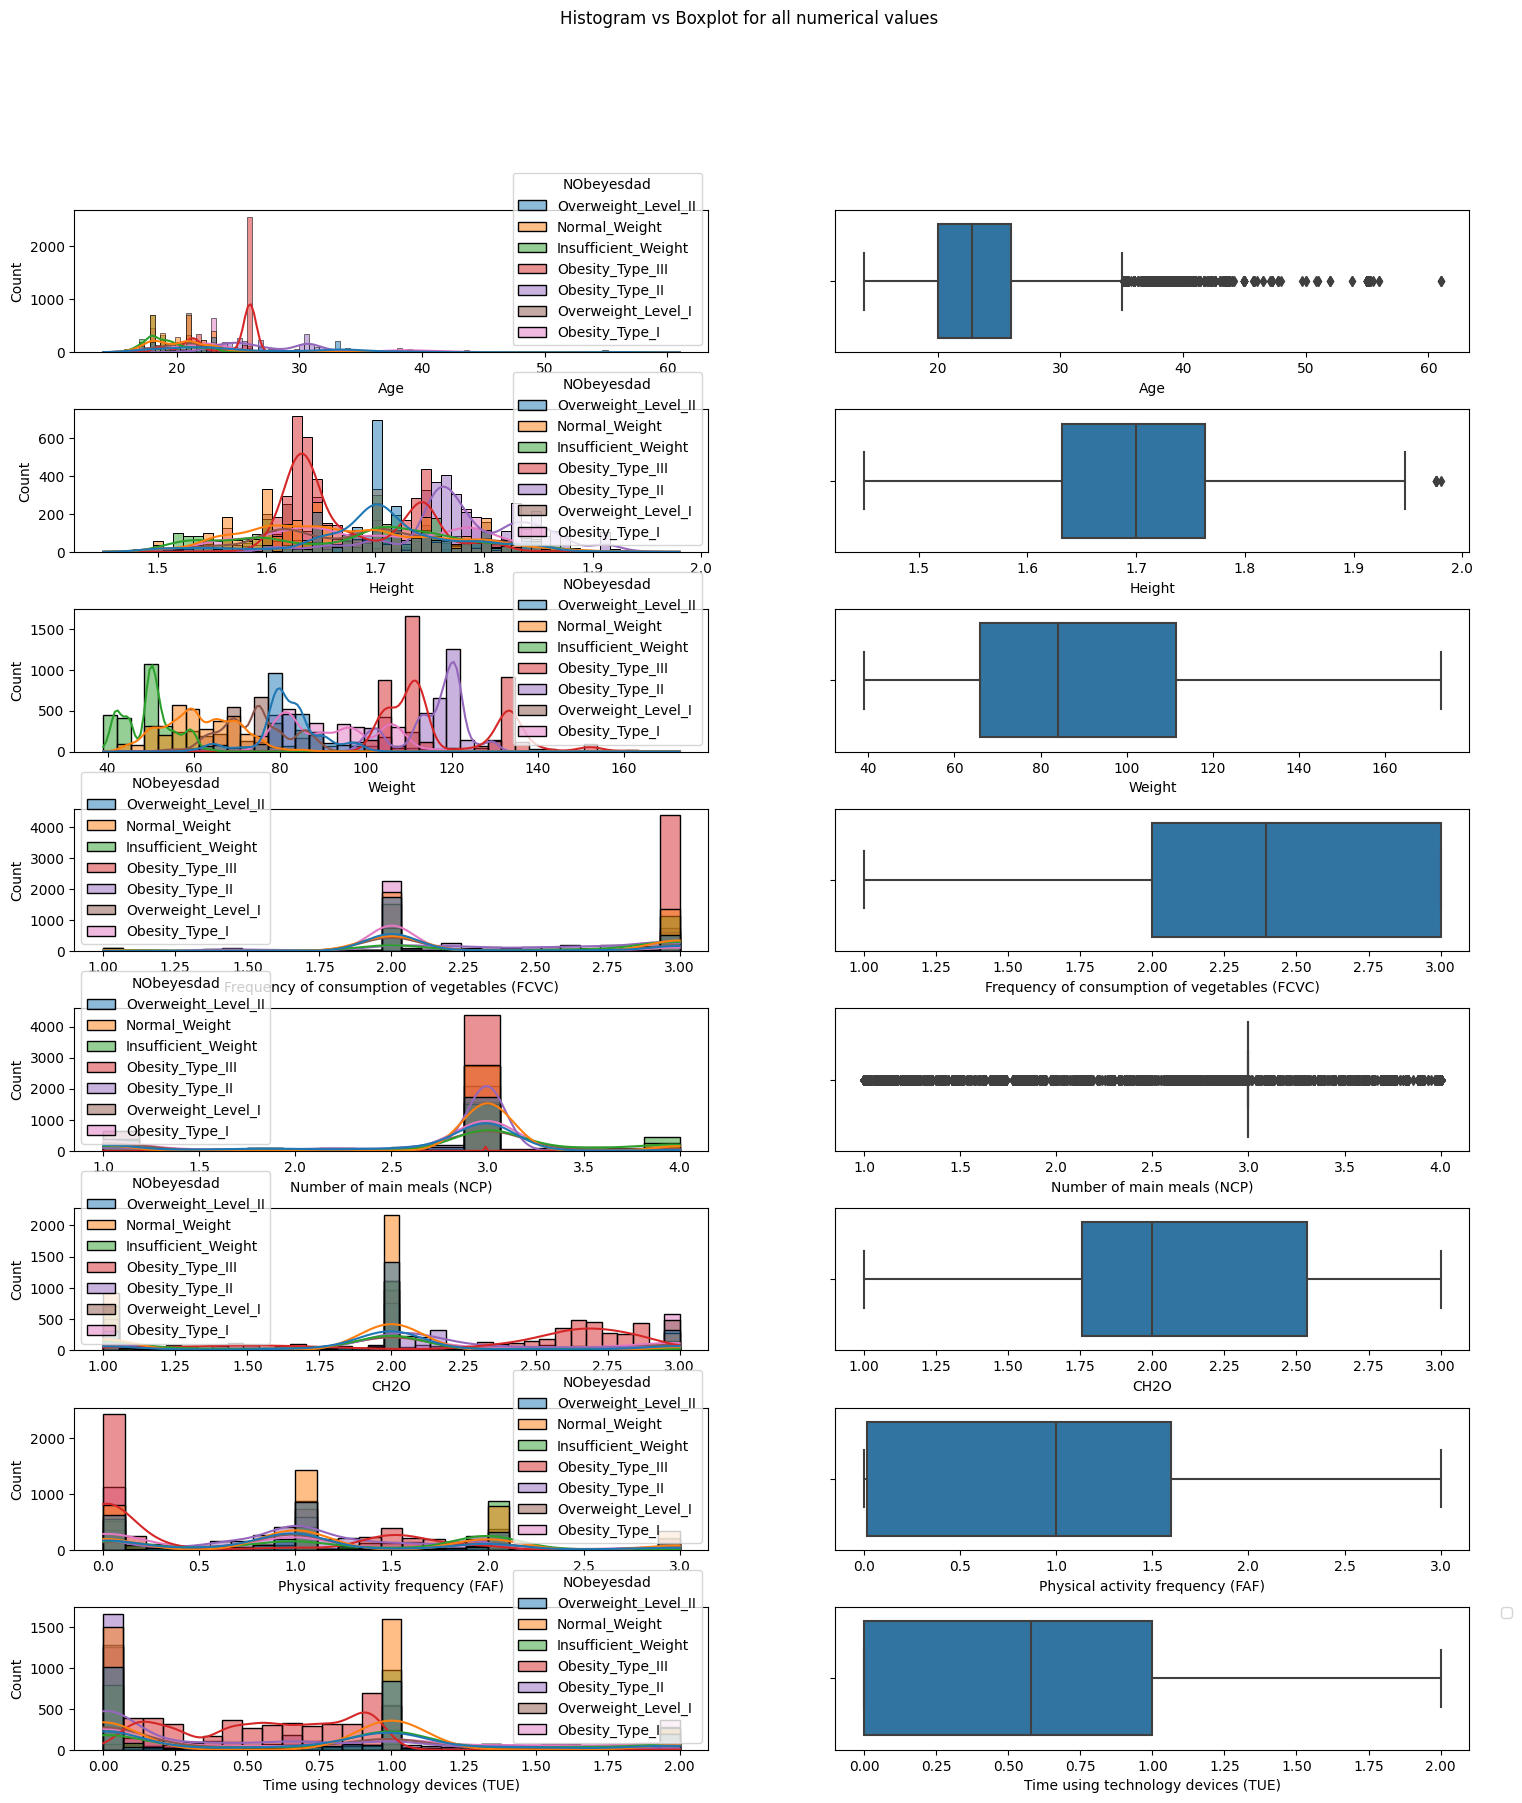

In [14]:
plot_box_hist(full_train)

### Notes:
1. We can observe that the majority of numerical features are free of outliers.
2. It is clear that heavier human means higher risk of obesity.
3. Most outliers are observed in the `Age` and surely in `NCP (The number of main meals)`. Further analysis is needed.
4. `Physical activity frequency (FAF)` gives us a significant realistic value about the risk.


<div style="background-color: #3498db; color: white; padding: 10px; font-size: 16px; font-weight: bold; text-align: center; border-radius: 10px;" style="background-color: #3498db; color: white; padding: 10px; font-size: 20px; font-weight: bold; text-align: center; border-radius: 10px;" id="33">3.3 Distribution of Categorical values</div>

<Figure size 2200x1000 with 0 Axes>

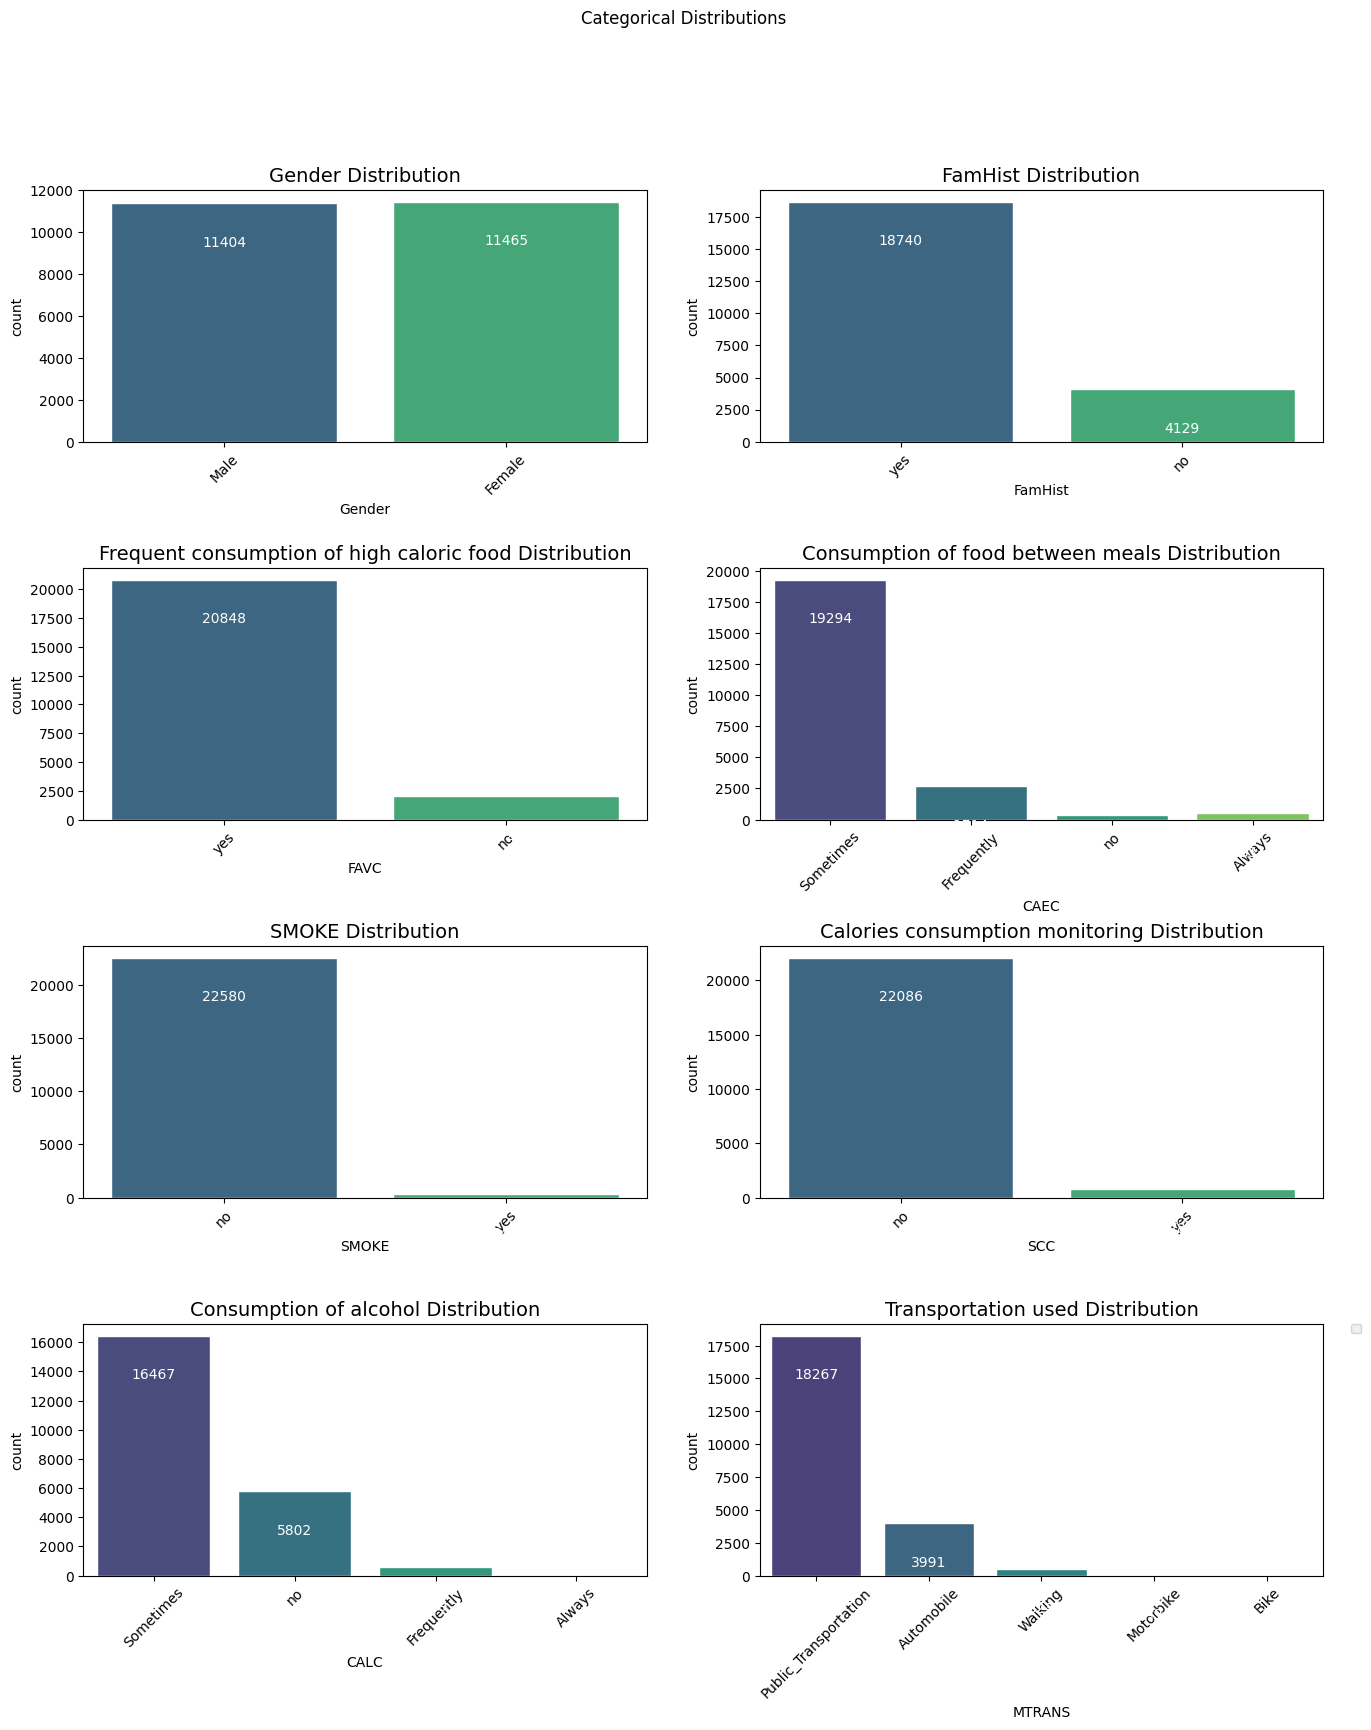

In [15]:
plot_categorical_distributions(full_train, "Categorical Distributions")

<div style="background-color: #3498db; color: white; padding: 10px; font-size: 16px; font-weight: bold; text-align: center; border-radius: 10px;" style="background-color: #3498db; color: white; padding: 10px; font-size: 20px; font-weight: bold; text-align: center; border-radius: 10px;" id="34">3.4 Distribution of Target class</div>

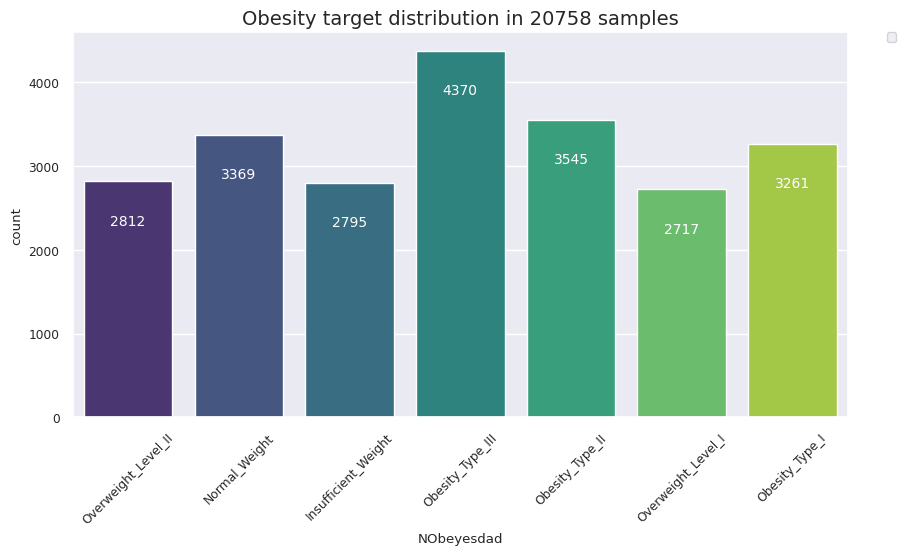

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
plot_column_count(data=full_train, column="NObeyesdad", axes=axes, title=f"Obesity target distribution in {train_df.shape[0]} samples")

### Notes:
1. Classes are unbalanced (but not highly). We should further investigate this issue, in order to use **Stratified KFold Cross-Validation**.


<div style="background-color: #3498db; color: white; padding: 10px; font-size: 16px; font-weight: bold; text-align: center; border-radius: 10px;" style="background-color: #3498db; color: white; padding: 10px; font-size: 20px; font-weight: bold; text-align: center; border-radius: 10px;" id="35">3.5 Pair-plot all numerical values along with target class</div>

In [17]:
# commented out -> requires a lot of time to compile
# plot_numerical_distributions(full_train)

### Notes
1. We can not take any clear information about the relationals plots of numerical values.

<div style="background-color: #3498db; color: white; padding: 10px; font-size: 16px; font-weight: bold; text-align: center; border-radius: 10px;" style="background-color: #3498db; color: white; padding: 10px; font-size: 20px; font-weight: bold; text-align: center; border-radius: 10px;" id="36">3.6 Heatmap of all numerical values</div>

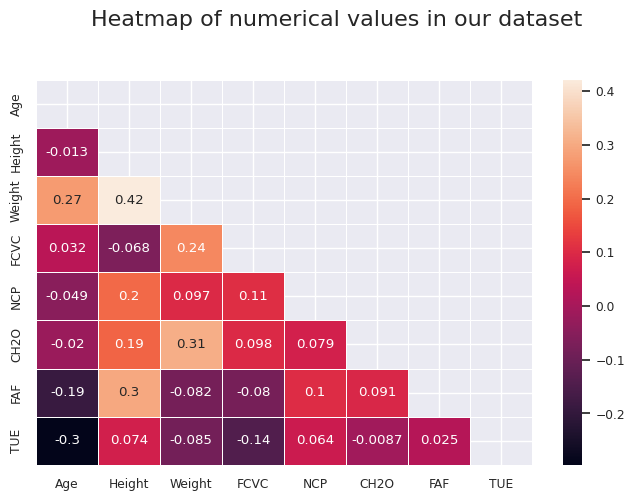

In [18]:
plot_heatmap(full_train)

### Notes:
1. **Weight** and **Height** show a considerable association.
2. A strong link between **Age** and **Weight**.
3. **Height** influences the **frequency of physical activity (FAF)**, **daily water consumption(CH20)**, and **vegetable eating(FCVC)**. Further analysis for Feature Engineering!
4. The **daily water consumption(CH20)** and the **vegetable eating(FCVC)** play an essential impact in the **Weight**. Further analysis for Feature Engineering!
5. The link between the **number of major meals(NCP)** and the **vegetable eating(FCVC)** implies that **number of major meals(NCP)** contain a limited amount of vegetables, indicating a risk of obesity.

<div style="background-color: #3498db; color: white; padding: 10px; font-size: 16px; font-weight: bold; text-align: center; border-radius: 10px;" style="background-color: #3498db; color: white; padding: 10px; font-size: 20px; font-weight: bold; text-align: center; border-radius: 10px;" id="37">3.7 Categorical vs Target Class</div>

<Figure size 2200x1000 with 0 Axes>

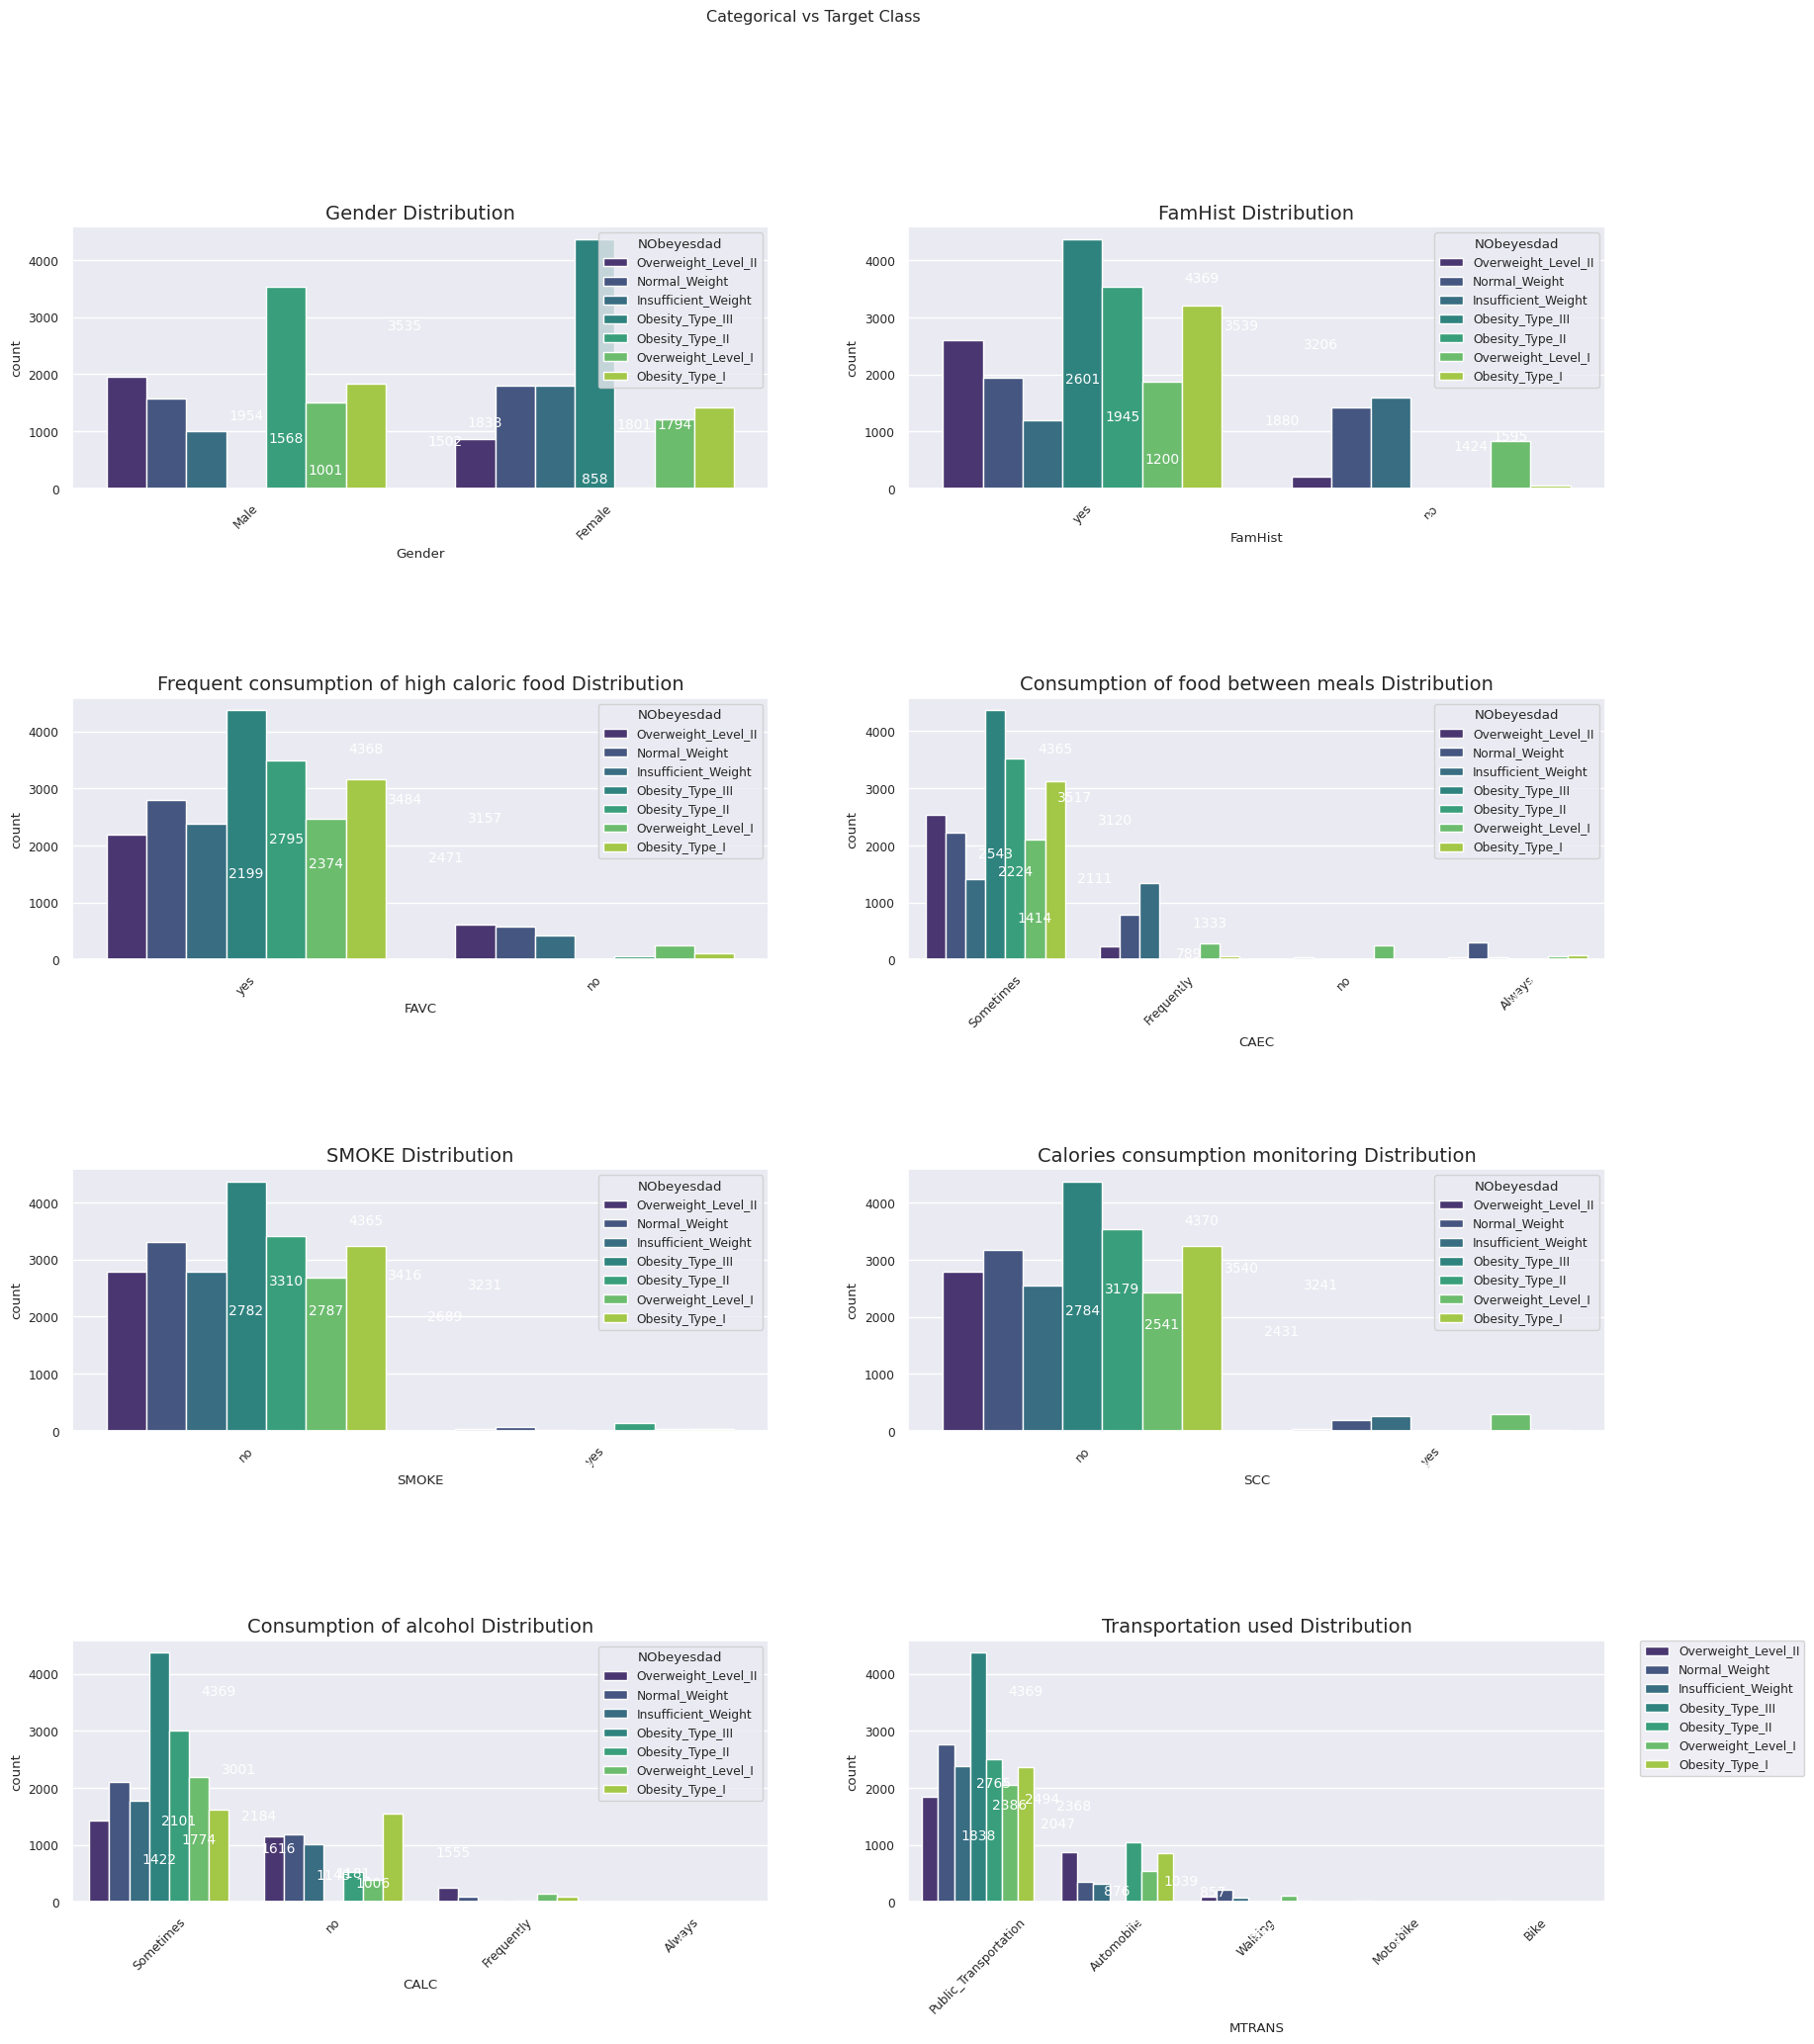

In [19]:
plot_relationships(full_train, title="Categorical vs Target Class")

### Notes:
1. Females are more likely to be fat. In instance, there is **no guy with Obesity Type III!**. Further analysis for Feature Engineering!
1. Having a relative with a history of obesity increases your chances of becoming fat.
1. The danger increases when you consume more high-calorie foods.
1. Even if you eat in between your big meals, you will get obese.
1. Does the CAEC means food between MAIN meals? Maybe an additional CountAllMeals column will help!
1. Smoking does not significantly increase the risk of obesity.
1. However, alcohol has a significant impact on obesity (even if it is uncommon). Further analysis for Feature Engineering!
1. Not monitoring your calorie intake means a greater risk of obesity. Further analysis for Feature Engineering!
1. The mean of transportation does not provide any substantial information about the risk because a large majority of the samples utilize solely public transportation, and all classes have high values (the highest being Obesity Type III). Further analysis for Feature Engineering!

<div style="background-color: #3498db; color: white; padding: 10px; font-size: 16px; font-weight: bold; text-align: center; border-radius: 10px;" style="background-color: #3498db; color: white; padding: 10px; font-size: 20px; font-weight: bold; text-align: center; border-radius: 10px;" id="38">3.8 Outliers analysis</div>

#### As we observed in [3.2 Subsection](#32), Age and the Number of Main Meals (NCP) have some weird outliers. Thus, we have to do an extensive analysis for these two features, to further check if we need to drop these columns or to apply some statistical methods to normalize the values for greater results.

count    22869.000000
mean        23.885263
std          5.753419
min         14.000000
25%         20.000000
50%         22.815416
75%         26.000000
max         61.000000
Name: Age, dtype: float64

Age
18.000000    2044
26.000000    1907
21.000000    1739
23.000000    1291
19.000000     945
             ... 
25.838425       1
25.746113       1
38.088860       1
33.852953       1
20.147114       1
Name: count, Length: 1739, dtype: int64


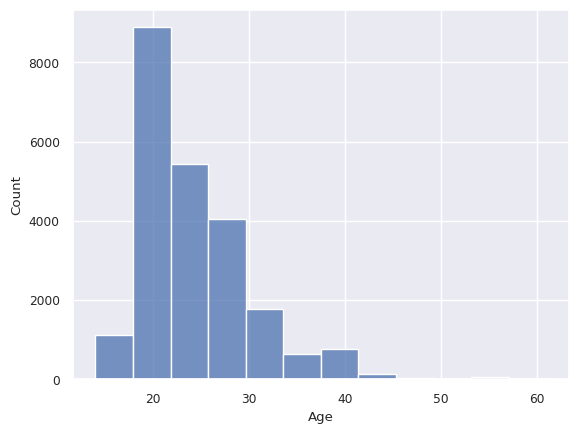

In [20]:
sns.histplot(data=full_train, x="Age", bins=12)

display(full_train.Age.describe())
print(full_train.Age.value_counts())

In [21]:
def outlier_detection(df:pd.DataFrame, column:str):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)    
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[~((df[column] >= lower_bound) & (df[column] <= upper_bound))]
    print(f"Statistical analysis for outliers of column {column} in our Dataset: {round(len(outliers)/len(df)*100, 2)}% outliers")
    print()
    display(outliers.describe())
    
    plt.figure(figsize=(12,8))
    sns.histplot(data=outliers, x=column, bins=12)

    

Statistical analysis for outliers of column Age in our Dataset: 5.43% outliers



,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000
mean,11896.312399,40.130420,1.649655,85.654389,2.300057,2.630807,1.798263,0.731203,0.161822
std,6878.492375,4.510898,0.094239,16.237158,0.412003,0.719824,0.594915,0.835839,0.406685
min,26.000000,35.125401,1.450000,45.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5835.250000,37.633352,1.560072,77.492489,2.000000,2.776840,1.146595,0.000000,0.000000
50%,11600.500000,38.748307,1.650000,80.000000,2.000000,3.000000,1.966223,0.598655,0.000000
75%,18225.250000,40.973007,1.750000,91.287368,2.732689,3.000000,2.000000,1.000000,0.000000
max,22537.000000,61.000000,1.910000,121.889803,3.000000,4.000000,3.000000,3.000000,2.000000


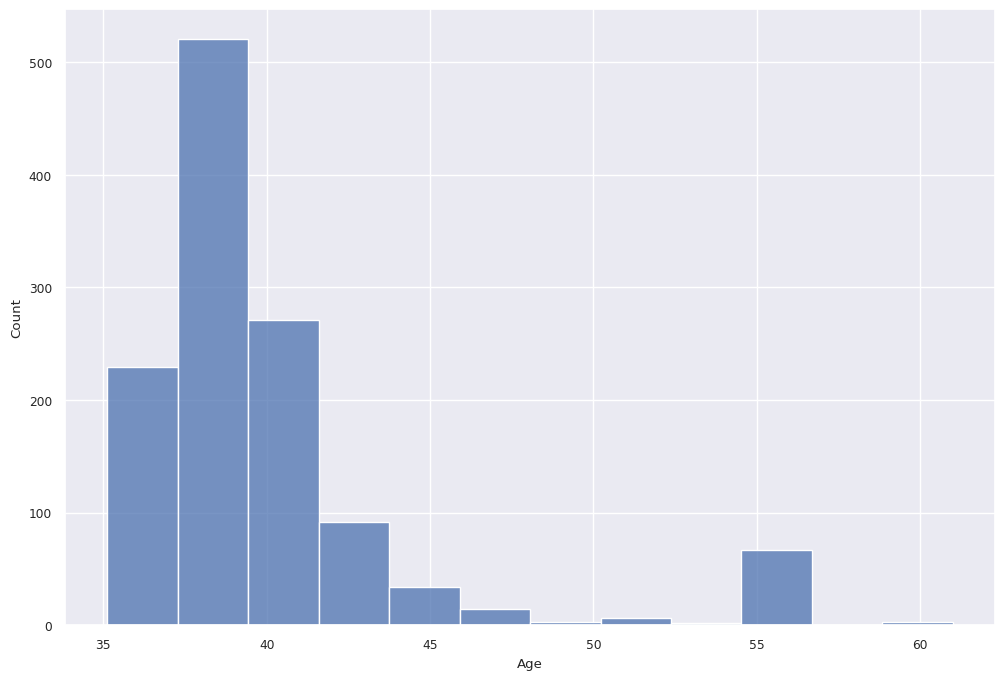

In [22]:
outlier_detection(full_train, "Age")

### Notes:
1. The are **~6% outliers** in Age column, which are too many to delete them.
2. Regarding the first note, we could see that all outliers are not equally distributed in the main range of Age column (i.e. 14-61). Thus, we can not remove them, as it will learn only patterns for people under the age of 35. 
3. There are ages with decimal points, which is weird. We need to explore them more, to apply some rounding. Further analysis for Feature Engineering

count    22869.000000
mean        23.893349
std          5.765917
min         14.000000
25%         20.000000
50%         23.000000
75%         26.000000
max         61.000000
Name: Age, dtype: float64

Age
26    3254
21    2953
18    2604
23    2512
22    1651
19    1643
20    1264
24     837
17     768
25     752
31     692
27     511
33     449
30     417
38     318
34     292
29     259
32     236
28     227
16     205
39     178
37     167
41     145
35     144
40     126
55      65
44      42
36      34
42      33
45      25
43      21
46       8
47       7
14       6
15       4
48       4
51       3
61       3
50       3
52       3
56       2
54       2
Name: count, dtype: int64


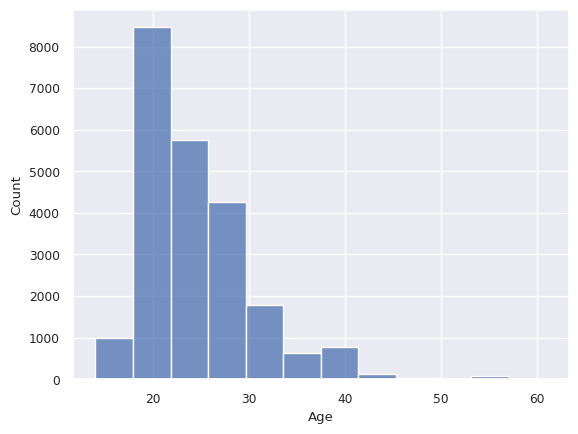

In [23]:
df_copy = full_train.copy()
df_copy["Age"]=df_copy["Age"].apply(lambda x:round(x))
sns.histplot(data=df_copy, x="Age", bins=12)

display(df_copy.Age.describe())
print(df_copy.Age.value_counts())

Statistical analysis for outliers of column Age in our Dataset: 5.2% outliers



,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,11883.165685,40.371741,1.647348,85.720899,2.299275,2.632616,1.791795,0.715351,0.151043
std,6867.678239,4.488077,0.094515,16.388506,0.411615,0.723405,0.592694,0.835439,0.395781
min,26.000000,36.000000,1.450000,45.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5823.000000,38.000000,1.560000,77.550345,2.000000,2.776840,1.142644,0.000000,0.000000
50%,11564.000000,39.000000,1.650000,80.000000,2.000000,3.000000,1.964435,0.554646,0.000000
75%,18110.000000,41.000000,1.750000,92.000000,2.724121,3.000000,2.000000,1.000000,0.000000
max,22537.000000,61.000000,1.910000,121.889803,3.000000,4.000000,3.000000,3.000000,2.000000


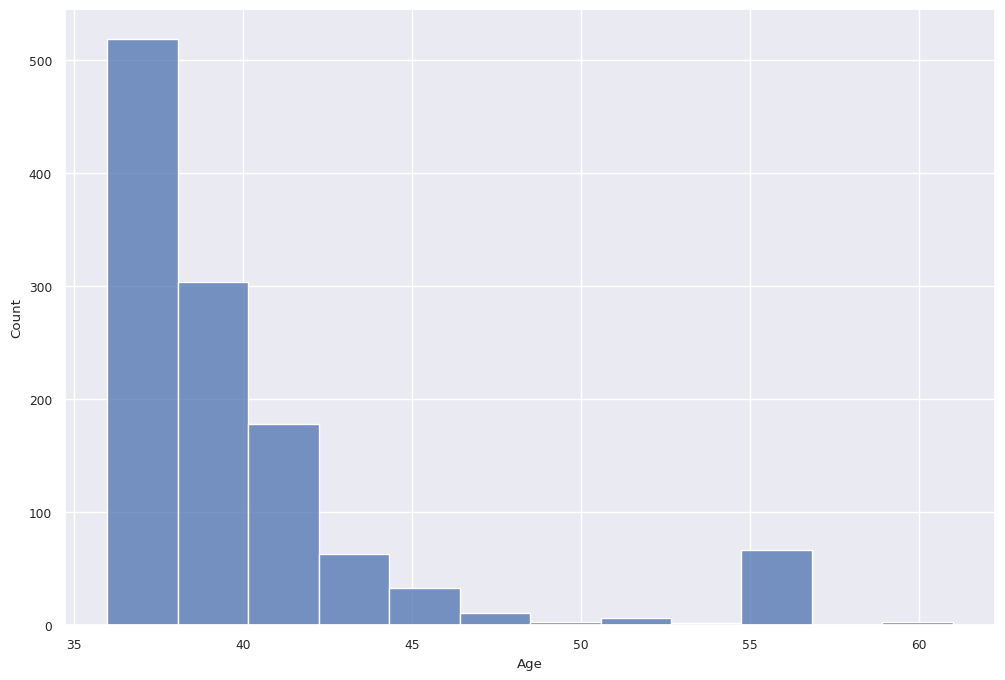

In [24]:
outlier_detection(df_copy, "Age")

Text(0.5, 0, 'Rounded Age (Boxplot)')

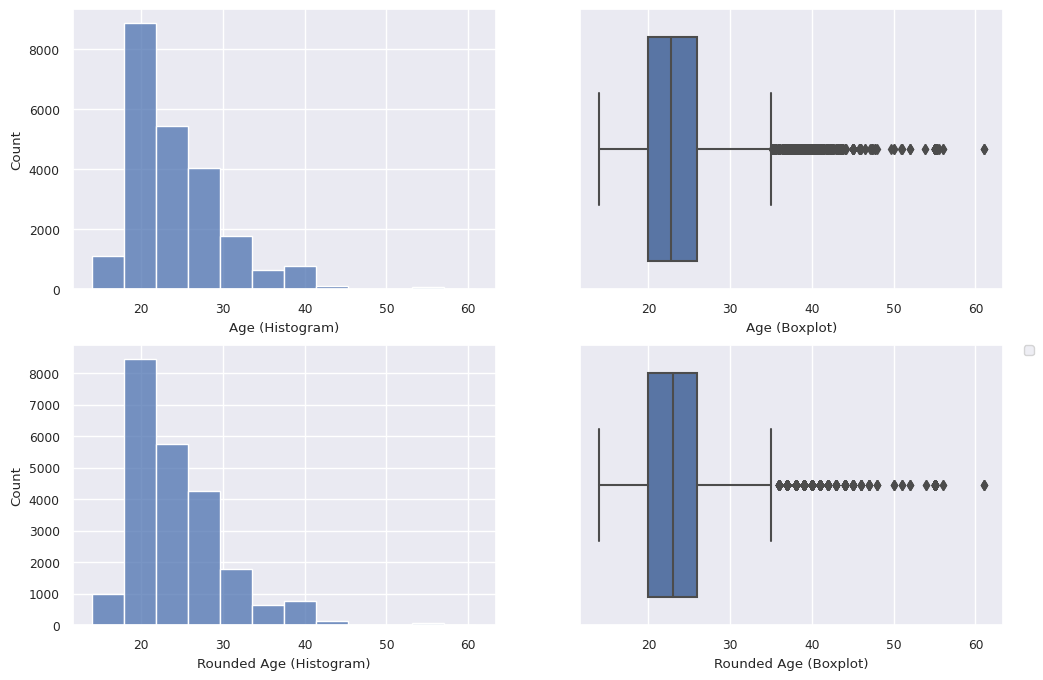

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, figsize=(12, 8))
sns.histplot(data=full_train, x="Age", ax=axes[0, 0], bins=12)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
sns.boxplot(data=full_train, x="Age", ax=axes[0, 1])
axes[0, 0].set_xlabel("Age (Histogram)")
axes[0, 1].set_xlabel("Age (Boxplot)")


sns.histplot(data=df_copy, x="Age", ax=axes[1, 0], bins=12)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
sns.boxplot(data=df_copy, x="Age", ax=axes[1, 1])
axes[1, 0].set_xlabel("Rounded Age (Histogram)")
axes[1, 1].set_xlabel("Rounded Age (Boxplot)")

### Notes:
1. Rounding did not manage to give us a better insight or reduce the outlier percentage of the dataset. Thus, we have to think another technique for Age in Feature Engineering.
2. Additionally, we observe a Right Skew in both plots. We should create Age groups

### Now let's analyse the NCP column

count    22869.000000
mean         2.754344
std          0.712711
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          4.000000
Name: NCP, dtype: float64

NCP
3.000000    15909
1.000000     2175
4.000000      784
2.993623       40
2.695396       26
            ...  
2.996084        1
2.734762        1
2.991666        1
2.838388        1
2.499108        1
Name: count, Length: 740, dtype: int64


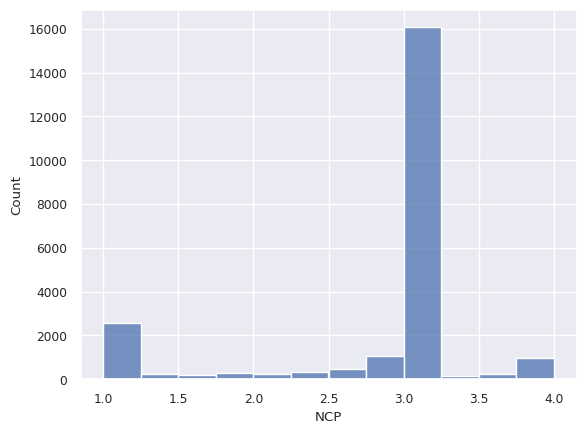

In [26]:
sns.histplot(data=full_train, x="NCP", bins=12)

display(full_train.NCP.describe())
print(full_train.NCP.value_counts())

Statistical analysis for outliers of column NCP in our Dataset: 30.43% outliers



,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000
mean,11848.621552,23.799953,1.693999,79.015319,2.316405,2.192830,1.907854,1.056441,0.584251
std,6751.001246,6.240945,0.096175,22.213272,0.500028,1.102678,0.593740,0.794555,0.649179
min,1.000000,16.000000,1.456346,39.101805,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5924.250000,19.407204,1.620000,61.000000,2.000000,1.000000,1.508590,0.316475,0.000000
50%,11867.500000,22.000000,1.700000,80.000000,2.000000,2.129909,2.000000,1.000000,0.328030
75%,17879.750000,25.000000,1.765167,94.000000,2.880792,2.988539,2.094479,1.857351,1.000000
max,22557.000000,55.493687,1.975663,129.966428,3.000000,4.000000,3.000000,3.000000,2.000000


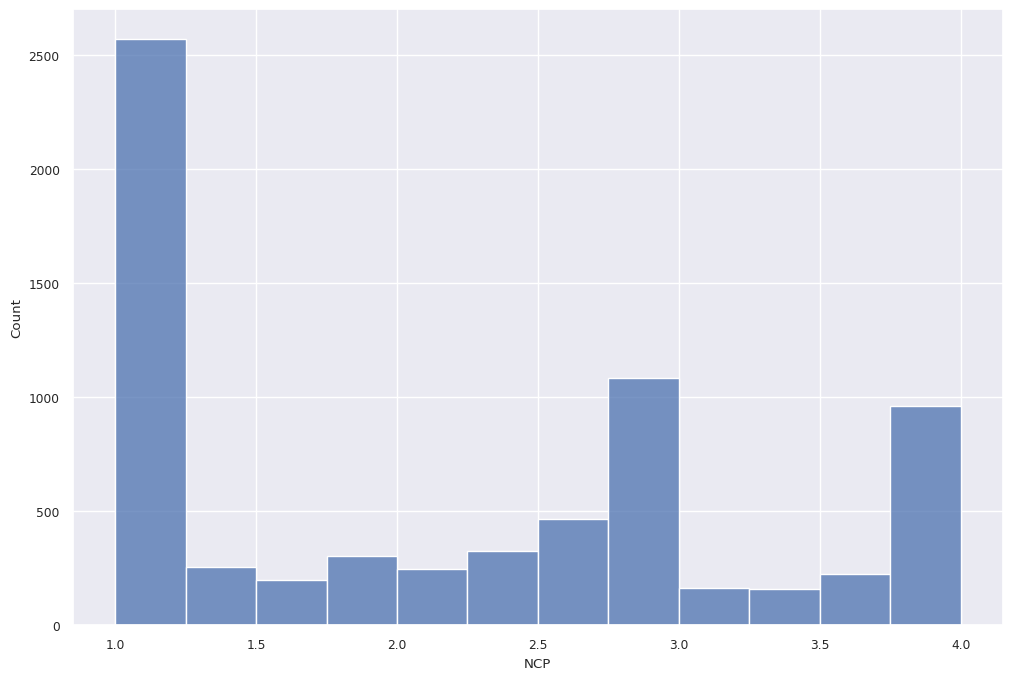

In [27]:
outlier_detection(full_train, "NCP")

### Notes:
1. There A LOT outliers in the dataset for the column NCP. (in particular the **~31%**).
2. The are many decimal numbers, which is weird when the Number of Main Meals Consumed is concerned. Further analysis is needed.

count    22869.000000
mean         2.757838
std          0.731214
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          4.000000
Name: NCP, dtype: float64

NCP
3    17779
1     2826
4     1189
2     1075
Name: count, dtype: int64
Statistical analysis for outliers of column NCP in our Dataset: 22.26% outliers



,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,5090.000000,5090.000000,5090.000000,5090.000000,5090.000000,5090.000000,5090.000000,5090.000000,5090.000000
mean,11820.079175,23.232997,1.680168,74.692326,2.305692,1.911984,1.893639,1.043942,0.602979
std,6728.517294,6.047865,0.094389,20.133960,0.512282,1.217428,0.608832,0.820636,0.664251
min,3.000000,16.000000,1.463167,39.591159,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5946.500000,19.000000,1.609405,59.209450,2.000000,1.000000,1.369546,0.167943,0.000000
50%,11864.500000,21.033794,1.678330,77.684229,2.000000,1.000000,2.000000,1.000000,0.371941
75%,17862.750000,24.007488,1.751225,87.000000,2.919526,2.000000,2.000000,1.942853,1.000000
max,22557.000000,55.493687,1.975663,129.852531,3.000000,4.000000,3.000000,3.000000,2.000000


Text(0.5, 0, 'Rounded NCP (Boxplot)')

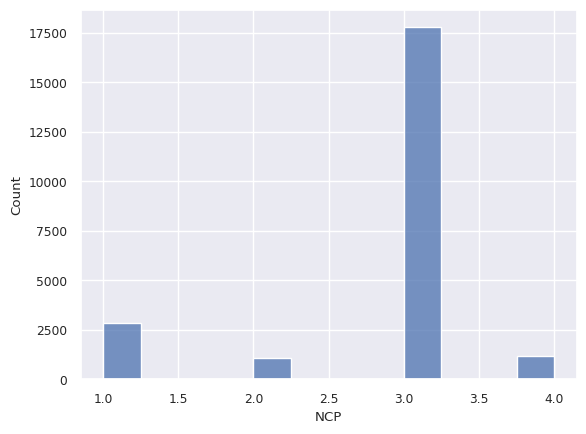

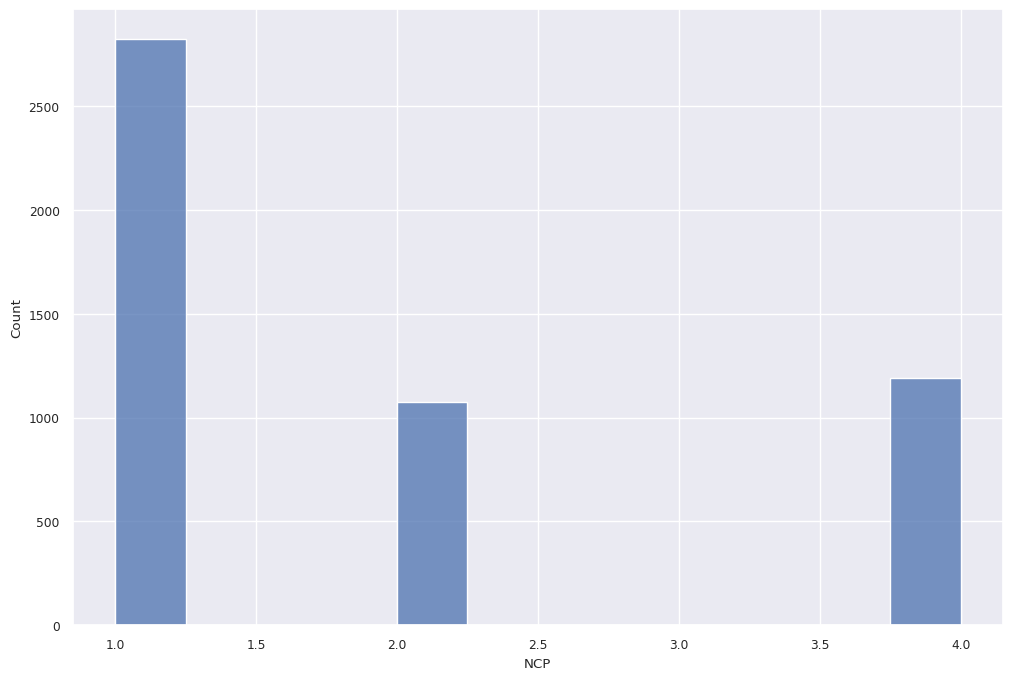

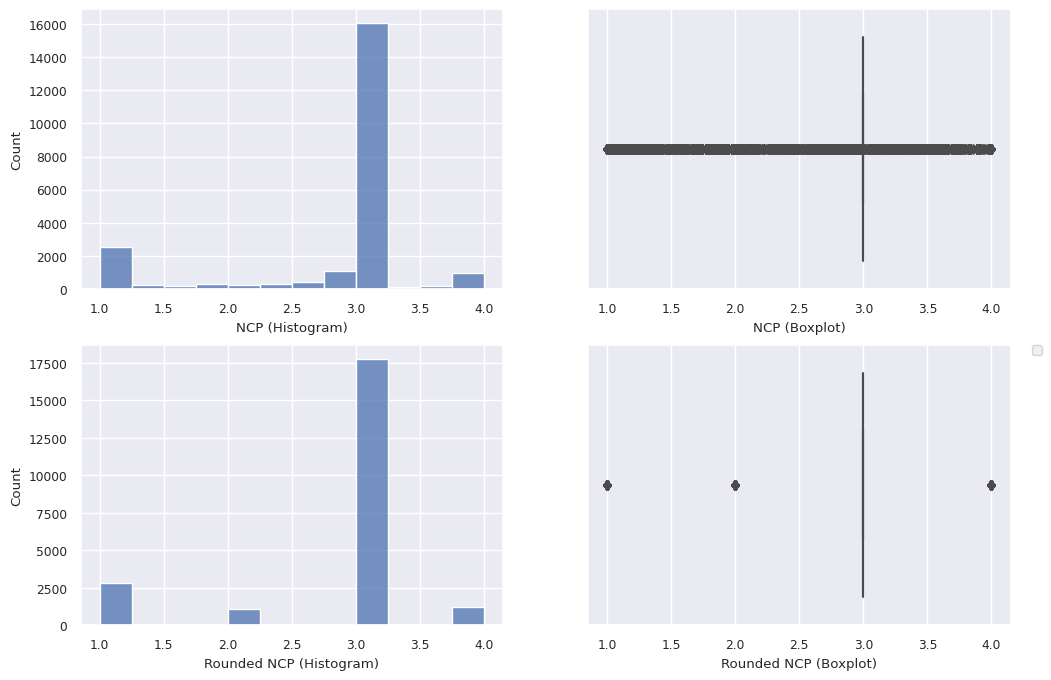

In [28]:
df_copy = full_train.copy()
df_copy["NCP"]=df_copy["NCP"].apply(lambda x:round(x))
sns.histplot(data=df_copy, x="NCP", bins=12)

display(df_copy.NCP.describe())
print(df_copy.NCP.value_counts())
outlier_detection(df_copy, "NCP")

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, figsize=(12, 8))
sns.histplot(data=full_train, x="NCP", ax=axes[0, 0], bins=12)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
sns.boxplot(data=full_train, x="NCP", ax=axes[0, 1])
axes[0, 0].set_xlabel("NCP (Histogram)")
axes[0, 1].set_xlabel("NCP (Boxplot)")


sns.histplot(data=df_copy, x="NCP", ax=axes[1, 0], bins=12)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
sns.boxplot(data=df_copy, x="NCP", ax=axes[1, 1])
axes[1, 0].set_xlabel("Rounded NCP (Histogram)")
axes[1, 1].set_xlabel("Rounded NCP (Boxplot)")

### Notes:
1. The outliers values persist after rounding. (i.e. **~22%** ). Thus, we can not drop them!
2. We can create a group variable **MealRange** (i.e. 0-1 meals, 1-2 meals, and so on), as there are many fractions.

### Let's compare the provied train dataset with the original one.

Statistical analysis for outliers of column NCP in our Dataset: 27.43% outliers



,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,23.773744,1.678491,73.911287,2.356663,1.949254,1.955527,1.046256,0.637924
std,6.504988,0.099495,19.247141,0.515184,1.178617,0.617146,0.856104,0.659627
min,16.000000,1.480000,39.850137,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.256816,1.605864,59.226478,2.000000,1.000000,1.459028,0.174584,0.000000
50%,21.529439,1.670000,75.057177,2.222282,1.340361,2.000000,1.000000,0.492528
75%,25.751723,1.758584,87.051316,2.914382,3.533027,2.353576,1.972278,1.000000
max,55.000000,1.930000,125.000000,3.000000,4.000000,3.000000,3.000000,2.000000


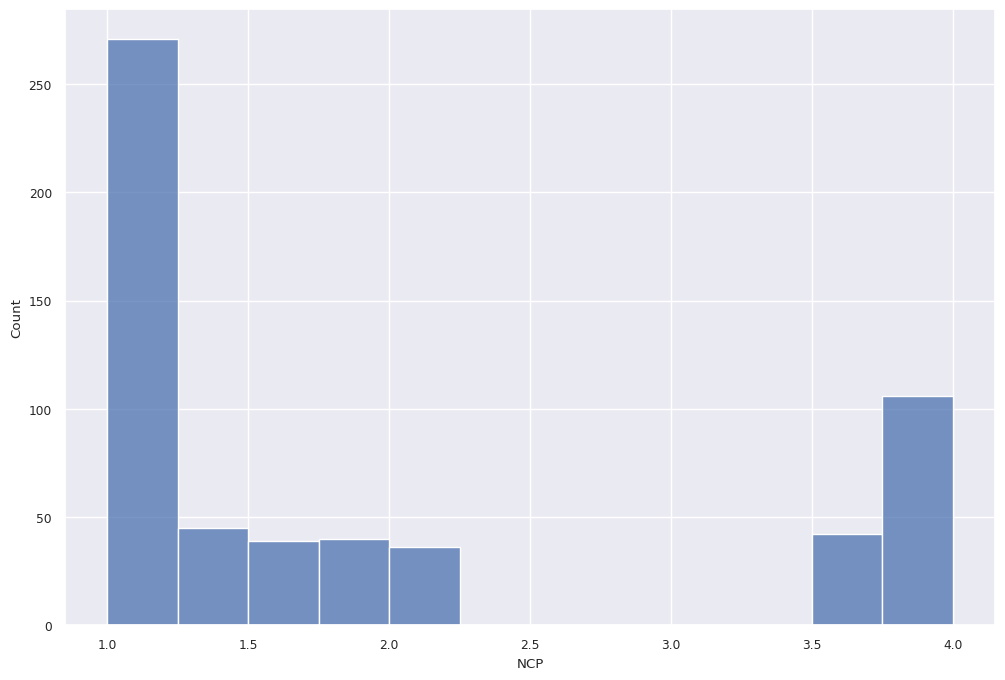

In [29]:
outlier_detection(orig_df, "NCP")

Statistical analysis for outliers of column NCP in our Dataset: 29.16% outliers



,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,6052.000000,6052.000000,6052.000000,6052.000000,6052.000000,6052.000000,6052.000000,6052.000000,6052.000000
mean,10368.576999,23.730869,1.694424,79.209077,2.311663,2.181384,1.901806,1.054835,0.575793
std,5967.590277,6.168733,0.095776,22.372862,0.499090,1.109930,0.594002,0.791150,0.650128
min,0.000000,16.000000,1.456346,39.101805,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5134.750000,19.407204,1.620000,61.000000,2.000000,1.000000,1.507358,0.326792,0.000000
50%,10323.500000,22.000000,1.700000,80.000000,2.000000,2.120936,2.000000,1.000000,0.268318
75%,15504.000000,24.825393,1.765137,94.256547,2.883745,2.983297,2.039535,1.856119,1.000000
max,20756.000000,55.493687,1.975663,129.966428,3.000000,4.000000,3.000000,3.000000,2.000000


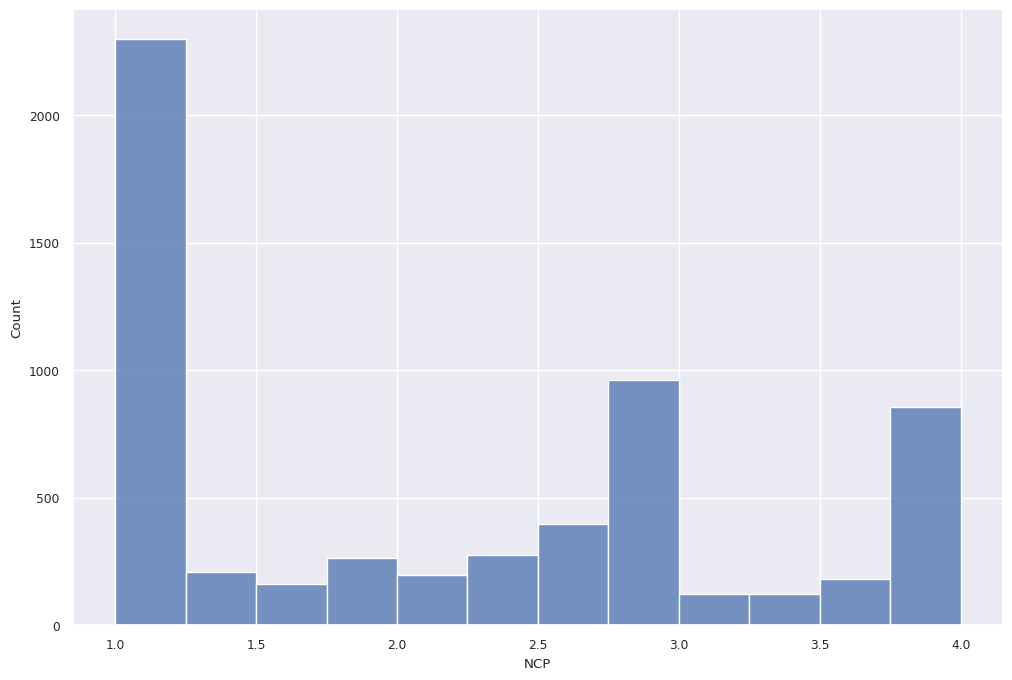

In [30]:
outlier_detection(train_df, "NCP")

### Notes:
1. As we can see, the portion of outliers in the provided dataset is the same with the original one. Thus, some survey takers answered with fractions maybe.

<div style="background-color: #3498db; color: white; padding: 10px; font-size: 20px; font-weight: bold; text-align: center; border-radius: 10px;" style="background-color: #3498db; color: white; padding: 10px; font-size: 20px; font-weight: bold; text-align: center; border-radius: 10px;" id="4">4. Feature Engineering</div>

[back to top](#0)

<div style="background-color: #3498db; color: white; padding: 10px; font-size: 16px; font-weight: bold; text-align: center; border-radius: 10px;" style="background-color: #3498db; color: white; padding: 10px; font-size: 20px; font-weight: bold; text-align: center; border-radius: 10px;" id="41">4.1 Intro</div>


In [31]:
# let's remember our variables
abrv_df = pd.DataFrame(data={"DESC":dictionary.values()}, index=dictionary.keys())
abrv_df

,DESC
FAVC,Frequent consumption of high caloric food
FCVC,Frequency of consumption of vegetables
NCP,Number of main meals
CAEC,Consumption of food between meals
CH20,Consumption of water daily
CALC,Consumption of alcohol
SCC,Calories consumption monitoring
FAF,Physical activity frequency
TUE,Time using technology devices
MTRANS,Transportation used


#### In this section we will use several techniques to apply Feature Engineering in our dataset. Some of these features are developed through research in the field. These are:
1. **Body mass index (BMI)**: BMI is a measure of body fat based on height and weight that applies to adult men and women. *BMI= weight / (height^2)*
1. **BMIClass** will give additional information about status of the sample.
1. **BMI_FAF** -> give more weight to persons who are more active.
1. **AgeGroup**, in order to reduce the potential impact of outliers.
1. **RiskFactor** --> (BMI + AgeGroup) * FamHistory
1. **NCPGroup**, in order to reduce the potential impact of outliers.
1. **IsFemale**, as we observed that Females tend to have higher risk for Obesity Type III.
1. **MTRANSClass** -> Give 2 points to walking and biking, 1 point for Public Transportation and 0 points for Motorbike and Car.
1. **HealthyActivity** -> **(FAF * MTRANS) + (NCP * FCVC * CH2O) - (CALC+SMOKE)**. Further analysis in training/validation mode, to check if this attribute helps our model.
1. **Ratio of High Caloric Food Consumption to Vegetable Consumption (FAVC_ratio_FCVC)**: *FAVC / FCVC*
1. **Meal Regularity (NCP_CAEC)** -> *NCP * CAEC*
1. **FoodTrackFactor**: FAF * SCC
1. **Activity_TechUse**: FAF - TUE
1. **HydrateEfficiency**: CH20 / FCVC
1. **TechUsageScore**: It quantifies the average amount of time a person spends using technology per unit of their age. TUE / Age

taken from: https://www.kaggle.com/code/ravi20076/playgrounds4e02-extraftre-models
1. **BMIbyNCP** = np.log1p(data["BMI"]) - np.log1p(data["NCP"])

#### The numbers are unbalanced in several ranges, thus we will lastly run a **Standard Scaler**.

<div style="background-color: #3498db; color: white; padding: 10px; font-size: 16px; font-weight: bold; text-align: center; border-radius: 10px;" style="background-color: #3498db; color: white; padding: 10px; font-size: 20px; font-weight: bold; text-align: center; border-radius: 10px;" id="42">4.2 Preprocessing & FE</div>

In [32]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from typing import List

class CustomCategoricalEncoder:
    def __init__(self, columns:List[str], case:str="nominal"):
        self.columns = columns
        self.case = case

    def fit(self,X,y=None):
        return self

    def transform(self,X):
        output = X.copy()
        if self.case == "nominal": 
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col]).astype(np.uint8)
        else:
            oe = OrdinalEncoder()
            output[self.columns] = oe.fit_transform(output[self.columns]).astype(np.uint8)
        
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [33]:
# create functions
def preprocess_cat_data(data:pd.DataFrame):
    # Preprocess categorical values    
    
    # selected this approach, because CustomCategoricalEncoder(OrdinalEncoder) gives higher values in frequent ones.
    # convert np.uint64 --> np.uint8 for less memory usage.
    data["Gender"] = data["Gender"].map({"Female": 0, "Male": 1}).astype(np.uint8)
    data["FamHist"] = data["FamHist"].map({"no": 0, "yes": 1}).astype(np.uint8)
    data["FAVC"] = data["FAVC"].map({"no": 0, "yes": 1}).astype(np.uint8)
    data["SMOKE"] = data["SMOKE"].map({"no": 0, "yes": 1}).astype(np.uint8)
    data["SCC"] = data["SCC"].map({"no": 0, "yes": 1}).astype(np.uint8)
    data["CAEC"] = data["CAEC"].map({"no": 0, "Sometimes": 1, "Frequently": 2, "Always": 3}).astype(np.uint8)
    data["CALC"] = data["CALC"].map({"no": 0, "Sometimes": 1, "Frequently": 2, "Always": 2}).astype(np.uint8)
        

def preprocess_num_data(data:pd.DataFrame):
    # Numerical ones
    numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
    for col in numerical_columns:
        data[col].astype(np.float32)
    

In [34]:
def feature_engineering(data:pd.DataFrame, addHealthyActivity:bool=False):
    preprocess_cat_data(data)
    preprocess_num_data(data)
    
    # IsFemale
    data['IsFemale'] = np.where(data['Gender']==0, 1, 0).astype(np.uint8)
    
    # BMI
    data['BMI'] = data['Weight'] / (data['Height']**2)

    # BMIClass (https://www.ncbi.nlm.nih.gov/books/NBK541070/)
    data['BMIClass'] = pd.cut(data['BMI'], bins=[0, 16.5, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')], 
                                labels=[0, 1, 2, 3, 4, 5, 6]).astype(np.uint8)
    
    # BMI_FAF
    data["BMI_FAF"] = (data['BMI'] * data['FAF'])/ 25.0
    
    # AgeGroup
    data['Age_Group'] = pd.cut(data['Age'], bins=[0, 20, 25, 30, 40, float('inf')], 
                               labels=[0, 1, 2, 3, 4]).astype(np.uint8)
    
    # RiskFactor
    data['RiskFactor'] = (data['BMI'] + data['Age_Group']) * data['FamHist']
    
    # NCPGroup
    data['NCPGroup'] = pd.cut(data['NCP'], bins=[0, 1, 2, 3, float('inf')], 
                               labels=[0, 1, 2, 3]).astype(np.uint8)
    
    # MTRANS_Factor --> assign higher values to physical activities
    data["MTRANS"] = data["MTRANS"].map({"Automobile": 0, "Motorbike": 0, "Public_Transportation": 1, "Walking": 2, "Bike": 2}).astype(np.uint8)

    # HealthyActivity
    if addHealthyActivity:
        data["HealthyActivity"] = (data['FAF'] * data["MTRANS"]) + (data['NCP']*data['FCVC']*data['CH2O']) - (data['CALC']+data['SMOKE'])
    
    # FAVC_ratio_FCVC
    data['FAVC_ratio_FCVC'] = data['FAVC'] / data['FCVC']
    
    # NCP_CAEC
    data['NCP_CAEC'] = data['NCP'] * data['CAEC']

    # FoodTrackFactor
    data['FoodTrackFactor'] = data['FAF'] * data['SCC']
    
    # Activity_TechUse
    data['Activity_TechUse'] = data['FAF'] - data['TUE']
    
    # HydrateEfficiency
    data['HydrateEfficiency'] = data['CH2O'] / data['FCVC']
    
    # TechUsageScore
    data['TechUsageScore'] = data['TUE'] / data['Age']
    
    # BMIbyNCP
    data['BMIbyNCP'] = np.log1p(data["BMI"]) - np.log1p(data["NCP"])
    
    return data
    
def standarize_data(data:pd.DataFrame):
    standardscl = StandardScaler()
    scaled_data = standardscl.fit_transform(data)
    return scaled_data, standardscl
    
    
    


<div style="background-color: #3498db; color: white; padding: 10px; font-size: 16px; font-weight: bold; text-align: center; border-radius: 10px;" style="background-color: #3498db; color: white; padding: 10px; font-size: 20px; font-weight: bold; text-align: center; border-radius: 10px;" id="43">4.3 Test Feature Engineering</div>

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestClassifier(max_depth=10, random_state=123)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return round(accuracy_score(y_valid, preds),4)

copy_df, copy_df2, copy_df3 = full_train.copy(), full_train.copy(), full_train.copy()
feature_engineering(copy_df, addHealthyActivity=True)
feature_engineering(copy_df3, addHealthyActivity=True)
feature_engineering(copy_df2, addHealthyActivity=False)

y1 = copy_df.NObeyesdad
le = LabelEncoder()
y1 = le.fit_transform(y1).astype(np.uint8)
X1 = copy_df.drop(['NObeyesdad'], axis=1)

y2 = copy_df2.NObeyesdad
le = LabelEncoder()
y2 = le.fit_transform(y2).astype(np.uint8)
X2 = copy_df2.drop(['NObeyesdad'], axis=1)

y3 = copy_df3.NObeyesdad
le = LabelEncoder()
y3 = le.fit_transform(y3).astype(np.uint8)
X3 = copy_df3.drop(['NObeyesdad'], axis=1)

# Divide data into training and validation subsets
X_train_full1, X_valid_full1, y_train1, y_valid1 = train_test_split(X1, y1, test_size=0.2,
                                                                random_state=0)
X_train_full1.drop('id', axis=1)
X_valid_full1.drop('id', axis=1)

# Divide data into training and validation subsets
X_train_full2, X_valid_full2, y_train2, y_valid2 = train_test_split(X2, y2, test_size=0.2,
                                                                random_state=0)
X_train_full2.drop('id', axis=1)
X_valid_full2.drop('id', axis=1)

# Divide data into training and validation subsets
X_train_full3, X_valid_full3, y_train3, y_valid3 = train_test_split(X3, y3, test_size=0.2,
                                                                random_state=0)
X_train_full3.drop('id', axis=1)
X_valid_full3.drop('id', axis=1)

X_train_full3, scl = standarize_data(X_train_full3)
X_valid_full3 = scl.transform(X_valid_full3)



print("With Healthy Activity:") 
print(f"Accuracy: {score_dataset(X_train_full1, X_valid_full1, y_train1, y_valid1)}")
print()
print("Approach Do not use Healthy Activity:") 
print(f"Accuracy: {score_dataset(X_train_full2, X_valid_full2, y_train2, y_valid2)}")
print()
print("Approach Use Standard Scaler:") 
print(f"Accuracy: {score_dataset(X_train_full3, X_valid_full3, y_train3, y_valid3)}")

With Healthy Activity:
Accuracy: 0.8942

Approach Do not use Healthy Activity:
Accuracy: 0.8935

Approach Use Standard Scaler:
Accuracy: 0.8942


As we can see, **HealthyActivity** column gave us better insight about the Target. Thus, we can keep this column in our Feature Engineering.

<div style="background-color: #3498db; color: white; padding: 10px; font-size: 20px; font-weight: bold; text-align: center; border-radius: 10px;" style="background-color: #3498db; color: white; padding: 10px; font-size: 20px; font-weight: bold; text-align: center; border-radius: 10px;" id="5">5. Modelling</div>

[back to top](#0)

<div style="background-color: #3498db; color: white; padding: 10px; font-size: 16px; font-weight: bold; text-align: center; border-radius: 10px;" style="background-color: #3498db; color: white; padding: 10px; font-size: 20px; font-weight: bold; text-align: center; border-radius: 10px;" id="51">5.1 Intro</div>


#### For the purposes of this competition we will use several architectures with promising results and they have proved that they win most of the Kaggle campaigns.
1. **XGBoost**
1. **LGBMClassifier**
1. **CatBoost**
1. **Ensemble architectures that combine the aforementioned models (and GaussianNB), in 2 approaches. Maximum Voting classifier and Meta-Stacking classifier.**

In order to determine which of the first three models is the best, we will also carry out a **stratified K-Fold Cross-Validation** and further generalize for fresh data. Furthermore, Optuna will be utilized to optimize the hyperparameters of every model in order to find the optimal set of parameters.

In [36]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score
import optuna

# for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import balanced_accuracy_score # for Gini-mean
from sklearn.metrics import roc_curve

SEED = 42

### Get the weight of each class, for better train the models

In [37]:
from sklearn.utils.class_weight import compute_class_weight
target = full_train.NObeyesdad
unique_classes = np.unique(np.array(target))

unique_classes_list = list(unique_classes)

class_weights = compute_class_weight('balanced', 
                                     classes=unique_classes_list,
                                     y=target)

class_weights_dict = dict(zip(unique_classes_list, class_weights))
print(class_weights_dict)

le = LabelEncoder()
target_encoded = le.fit_transform(target).astype(np.uint8)

unique_classes = np.unique(target_encoded)

unique_classes_list = list(unique_classes)

class_weights = compute_class_weight('balanced', 
                                     classes=unique_classes_list,
                                     y=target_encoded)

class_weights_dict = dict(zip(unique_classes_list, class_weights))
print(class_weights_dict)

{'Insufficient_Weight': 1.1688729874776387, 'Normal_Weight': 0.9697239536954586, 'Obesity_Type_I': 1.0018399264029438, 'Obesity_Type_II': 0.9215796897038082, 'Obesity_Type_III': 0.7475972540045767, 'Overweight_Level_I': 1.2024291497975708, 'Overweight_Level_II': 1.1618065433854907}
{0: 1.1688729874776387, 1: 0.9697239536954586, 2: 1.0018399264029438, 3: 0.9215796897038082, 4: 0.7475972540045767, 5: 1.2024291497975708, 6: 1.1618065433854907}


In [38]:
class_weights = {
                0: 1.1688729874776387, # Insufficient_Weight
                 1: 0.9697239536954586, # Normal_Weight
                 2: 1.0018399264029438, # Obesity_Type_I
                 3: 0.9215796897038082, # Obesity_Type_II
                 4: 0.7475972540045767, # Obesity_Type_III
                 5: 1.2024291497975708, # Overweight_Level_I
                 6: 1.1618065433854907 # Overweight_Level_II
                }

<div style="background-color: #3498db; color: white; padding: 10px; font-size: 16px; font-weight: bold; text-align: center; border-radius: 10px;" style="background-color: #3498db; color: white; padding: 10px; font-size: 20px; font-weight: bold; text-align: center; border-radius: 10px;" id="52">5.2 Custom Data & Model class</div>


In [39]:
from tqdm.notebook import tqdm_notebook
class CustomModelling:
    
    def __init__(
        self, 
        model,
        x_train:np.array, 
        y_train:np.array,
        x_test:np.array) -> None:
        
        self.model = model
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
    
    def train(self, features:np.array, target:np.array):
        self.model.fit(features, target)
        return self.model
    
    def inference(self, x_test:np.array) -> np.array:
        preds = self.model.predict(x_test)
        return preds
    
    def stratifiedKCV(self, splits:int, seed:int, print_reports:bool=True, isCatBoost:bool=False):
        skfolds = StratifiedKFold(n_splits=splits,random_state=seed,shuffle=True)
        training_scores, validation_scores, precission_scores, recall_scores, f1_scores = list(), list(), list(), list(), list()
        test_folds_predictions = list()

        for (train_idx, valid_idx) in tqdm_notebook(skfolds.split(self.x_train, self.y_train), total=skfolds.get_n_splits(), desc="Stratified K-Fold", ascii=" ▖▘▝▗▚▞█"):
            
            fold_x_train, fold_y_train = self.x_train.iloc[train_idx], self.y_train[train_idx]
            fold_x_valid, fold_y_valid = self.x_train.iloc[valid_idx], self.y_train[valid_idx]

            fold_model = self.model
            fold_model = self.train(fold_x_train, fold_y_train)
            
            fold_train_predicted = self.inference(fold_x_train)
            fold_valid_predicted = self.inference(fold_x_valid)
            
            # inference on test data
            fold_test_predicted = self.inference(self.x_test)
            # store the predictions of each fold
            test_folds_predictions.append(fold_test_predicted)
            
            
            fold_train_accuracy, _, _, _ = self.compute_scores(fold_y_train, fold_train_predicted)
            fold_valid_accuracy, fold_valid_precision, fold_valid_recall, fold_valid_f1 = self.compute_scores(fold_y_valid, fold_valid_predicted)
            

            training_scores.append(fold_train_accuracy)
            validation_scores.append(fold_valid_accuracy)
            precission_scores.append(fold_valid_precision)
            recall_scores.append(fold_valid_recall)
            f1_scores.append(fold_valid_f1)
            
        if print_reports:
            print("\n------------------------------------------------------------------------")
            print(f"Mean Accuracy on Training Data:", np.mean(training_scores))
            print(f"Mean Accuracy on Testing Data is:", np.mean(validation_scores))
            print(f"Mean Precision:", np.mean(precission_scores))
            print(f"Mean Recall:", np.mean(recall_scores))
            print(f"Mean F1 Score:", np.mean(f1_scores))

            # displaty classification reports after runnig on all test data
            predictions = cross_val_predict(self.model, self.x_train, self.y_train, cv=skfolds)
            self.classification_reports(self.y_train, predictions)
        
        # create statified test predictions
        stratified_test_predictions = self.create_stratified_preds(test_folds_predictions, isCatBoost)
        
        
        return stratified_test_predictions
    
    def create_stratified_preds(self, folds_preds:List[np.array], isCatBoost:bool=False) -> pd.DataFrame:
        # store each fold test predictions into a new df
        test_predictions_df = pd.DataFrame()
        for i in range(len(folds_preds)):
            if isCatBoost:
                test_predictions_df=pd.concat([test_predictions_df, pd.DataFrame(folds_preds[i])],
                                                  axis=1, ignore_index=True)
            else:
                test_predictions_df=pd.concat([test_predictions_df, pd.DataFrame(folds_preds[i].transpose())],
                                                  axis=1, ignore_index=True)

        # and use the pandas.mode function, which returns the most frequent value per row (i.e. per fold)
        stratified_test_predictions = test_predictions_df.mode(axis=1)[0]
        return stratified_test_predictions

            
    def compute_scores(self, gold_truths:np.array, predictions:np.array):
        accuracy = accuracy_score(gold_truths, predictions, normalize=True)
        precision = precision_score(gold_truths, predictions, average='weighted') 
        recall = recall_score(gold_truths, predictions, average='weighted')     
        f1 = f1_score(gold_truths, predictions, average='weighted')
        
        return accuracy, precision, recall, f1
    
    def classification_reports(self, gold_truths:np.array, predictions:np.array):
        print("\n------------------------------------------------------------------------")
        print(f"Classification Report:")
        print(classification_report(gold_truths, predictions))
        
        print("\n------------------------------------------------------------------------")
        print(f"Confusion Matrix:")
        cm = confusion_matrix(gold_truths, predictions)
        plt.figure(figsize=(8, 4))
        sns.heatmap(cm, annot=True, fmt="g", cmap="summer")
        plt.show()
        

In [40]:
class ObesityDataset:
    def __init__(self, train_data:pd.DataFrame, test_data:pd.DataFrame, seed:int=42):
        self.train_data = train_data
        self.test_data = test_data
        self.seed = seed
        np.random.seed(self.seed)
    
    def build_data(self, validation_size:float=0.2):
        # firstly, we need to drop the ID column (it's not needed)
        self.train_data.drop('id', axis=1, inplace=True)
        
        # get X_features and Targets
        target = self.train_data.NObeyesdad
        x_features = self.train_data.drop('NObeyesdad', axis=1)
        
        # Label Encode the target variable
        # we will also return this, for decoding the test predictions!
        le = LabelEncoder()
        
        # split first and then apply preprocessing and feature engineering steps
        # to avoid Data Leakage train-test
        if validation_size>0:
            x_train, x_valid, y_train, y_valid = self.make_splits(x_features, target, validation_size)

            # first fit in y_train, and the transform the y_valid
            y_train = le.fit_transform(y_train).astype(np.uint8)
            y_valid = le.transform(y_valid).astype(np.uint8)

            # apply feature engineering
            x_train = self.feature_engineering(x_train)
            x_valid = self.feature_engineering(x_valid)

            # Standarize unbalanced data
#             x_train_scaled, scaler = self.standarize_data(x_train)
#             x_valid_scaled = scaler.transform(x_valid)

        else:
            
            x_valid, y_valid = None, None

            # first fit in y_train, and the transform the y_valid
            y_train = le.fit_transform(target).astype(np.uint8)

            # apply feature engineering
            x_train = self.feature_engineering(x_features)

            # Standarize unbalanced data
#             x_train_scaled, scaler = self.standarize_data(x_train)
        
        # apply all aforementioned steps to test data
        test_ids = self.test_data.id
        test_features = self.test_data.drop('id', axis=1)

        x_test = self.feature_engineering(test_features)
#         x_test = scaler.transform(x_test)
        
        print("\n------------------------------------------------------------------------")
        print(f"Train samples: {len(x_train)} | Train targets: {len(y_train)}")
        print(f"Validation samples: {len(x_valid) if x_valid is not None else 0} | Validation targets: {len(y_valid) if x_valid is not None else 0}")
        print(f"Test samples: {len(x_test)}")
        print("\n------------------------------------------------------------------------")
        
        return x_train, y_train, x_valid, y_valid, x_test, test_ids, le
        
    
    def make_splits(self, x_train:pd.DataFrame, y_train:pd.Series, test_size:float=0.2):
        x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=test_size,
                                                                random_state=self.seed)
        return x_train, x_valid, y_train, y_valid
    
    def __preprocess_cat_data(self, data:pd.DataFrame):
        # Preprocess categorical values    

        # selected this approach, because CustomCategoricalEncoder(OrdinalEncoder) gives higher values in frequent ones.
        # convert np.uint64 --> np.uint8 for less memory usage.
        data["Gender"] = data["Gender"].map({"Female": 0, "Male": 1}).astype(np.uint16)
        data["FamHist"] = data["FamHist"].map({"no": 0, "yes": 1}).astype(np.uint16)
        data["FAVC"] = data["FAVC"].map({"no": 0, "yes": 1}).astype(np.uint16)
        data["SMOKE"] = data["SMOKE"].map({"no": 0, "yes": 1}).astype(np.uint16)
        data["SCC"] = data["SCC"].map({"no": 0, "yes": 1}).astype(np.uint16)
        data["CAEC"] = data["CAEC"].map({"no": 0, "Sometimes": 1, "Frequently": 2, "Always": 3}).astype(np.uint16)
        data["CALC"] = data["CALC"].map({"no": 0, "Sometimes": 1, "Frequently": 2, "Always": 2}).astype(np.uint16)
        


    def __preprocess_num_data(self, data:pd.DataFrame):
        # Numerical ones
        numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
        for col in numerical_columns:
            data[col] = data[col].astype(np.float32)
    
    def feature_engineering(self, data:pd.DataFrame):
        self.__preprocess_cat_data(data)
        self.__preprocess_num_data(data)

        # IsFemale
        data['IsFemale'] = np.where(data['Gender']==0, 1, 0).astype(np.uint16)

        # BMI
        data['BMI'] = data['Weight'] / (data['Height']**2)

        # BMIClass (https://www.ncbi.nlm.nih.gov/books/NBK541070/)
        data['BMIClass'] = pd.cut(data['BMI'], bins=[0, 16.5, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')], 
                                    labels=[0, 1, 2, 3, 4, 5, 6]).astype(np.uint16)

        # BMI_FAF
        data["BMI_FAF"] = (data['BMI'] * data['FAF'])/25.0

        # AgeGroup
        data['Age_Group'] = pd.cut(data['Age'], bins=[0, 20, 25, 30, 40, float('inf')], 
                                   labels=[0, 1, 2, 3, 4]).astype(np.uint16)

        # RiskFactor
        data['RiskFactor'] = (data['BMI'] + data['Age_Group']) * data['FamHist']

        # NCPGroup
        data['NCPGroup'] = pd.cut(data['NCP'], bins=[0, 1, 2, 3, float('inf')], 
                                   labels=[0, 1, 2, 3]).astype(np.uint16)

        # MTRANS_Factor --> assign higher values to physical activities
        data["MTRANS"] = data["MTRANS"].map({"Automobile": 0, "Motorbike": 0, "Public_Transportation": 1, "Walking": 2, "Bike": 2}).astype(np.uint16)

        # HealthyActivity
        data["HealthyActivity"] = (data['FAF'] * data["MTRANS"]) + (data['NCP']*data['FCVC']*data['CH2O']) - (data['CALC']+data['SMOKE'])

        # FAVC_ratio_FCVC
        data['FAVC_ratio_FCVC'] = data['FAVC'] / data['FCVC']

        # NCP_CAEC
        data['NCP_CAEC'] = data['NCP'] * data['CAEC']

        # FoodTrackFactor
        data['FoodTrackFactor'] = data['FAF'] * data['SCC']

        # Activity_TechUse
        data['Activity_TechUse'] = data['FAF'] - data['TUE']

        # HydrateEfficiency
        data['HydrateEfficiency'] = data['CH2O'] / data['FCVC']

        # TechUsageScore
        data['TechUsageScore'] = data['TUE'] / data['Age']

        # BMIbyNCP
        data['BMIbyNCP'] = np.log1p(data["BMI"]) - np.log1p(data["NCP"])

        return data

    def standarize_data(self, data:pd.DataFrame):
        standardscl = StandardScaler()
        scaled_data = standardscl.fit_transform(data)
        return scaled_data, standardscl
    
    

#### Create our dataset

In [41]:
optunaObesityDataset = ObesityDataset(train_data = full_train.copy(), test_data = test_df.copy())
finalObesityDataset = ObesityDataset(train_data = full_train.copy(), test_data = test_df.copy())

opt_string, final_string = "Optuna Dataset", "Final Dataset"
print(f"\n{opt_string:^70}")
x_train_opt, y_train_opt, x_valid_opt, y_valid_opt, x_test_opt, test_ids_opt, le_opt = optunaObesityDataset.build_data()
print(f"\n{final_string:^70}")
x_train, y_train, x_valid, y_valid, x_test, test_ids, le = finalObesityDataset.build_data(0)


                            Optuna Dataset                            

------------------------------------------------------------------------
Train samples: 18295 | Train targets: 18295
Validation samples: 4574 | Validation targets: 4574
Test samples: 13840

------------------------------------------------------------------------

                            Final Dataset                             

------------------------------------------------------------------------
Train samples: 22869 | Train targets: 22869
Validation samples: 0 | Validation targets: 0
Test samples: 13840

------------------------------------------------------------------------


In [42]:
x_train, x_valid


(       Gender        Age    Height      Weight  FamHist  FAVC      FCVC  \
 0           1  24.443010  1.699998   81.669952        1     1  2.000000   
 1           0  18.000000  1.560000   57.000000        1     1  2.000000   
 2           0  18.000000  1.711460   50.165752        1     1  1.880534   
 3           0  20.952738  1.710730  131.274857        1     1  3.000000   
 4           1  31.641081  1.914186   93.798058        1     1  2.679664   
 ...       ...        ...       ...         ...      ...   ...       ...   
 22864       0  20.976843  1.710730  131.408524        1     1  3.000000   
 22865       0  21.982943  1.748584  133.742950        1     1  3.000000   
 22866       0  22.524036  1.752206  133.689346        1     1  3.000000   
 22867       0  24.361937  1.739450  133.346634        1     1  3.000000   
 22868       0  23.664709  1.738836  133.472641        1     1  3.000000   
 
             NCP  CAEC  SMOKE  ...  RiskFactor  NCPGroup  HealthyActivity  \
 0      2

In [43]:
y_train

array([6, 1, 0, ..., 4, 4, 4], dtype=uint8)

In [44]:

x_test, test_ids

(       Gender        Age    Height      Weight  FamHist  FAVC      FCVC  \
 0           1  26.899885  1.848294  120.644180        1     1  2.938616   
 1           0  21.000000  1.600000   66.000000        1     1  2.000000   
 2           0  26.000000  1.643355  111.600555        1     1  3.000000   
 3           1  20.979254  1.553127  103.669113        1     1  2.000000   
 4           0  26.000000  1.627396  104.835342        1     1  3.000000   
 ...       ...        ...       ...         ...      ...   ...       ...   
 13835       1  23.327835  1.721384   78.030380        1     0  2.813234   
 13836       0  29.000000  1.590000   62.000000        0     1  3.000000   
 13837       0  22.935612  1.585547   44.376637        0     1  3.000000   
 13838       1  21.000000  1.620000   53.000000        1     1  2.000000   
 13839       1  26.490927  1.812259  120.980507        1     1  2.744994   
 
             NCP  CAEC  SMOKE  ...  RiskFactor  NCPGroup  HealthyActivity  \
 0      3

<div style="background-color: #3498db; color: white; padding: 10px; font-size: 16px; font-weight: bold; text-align: center; border-radius: 10px;" style="background-color: #3498db; color: white; padding: 10px; font-size: 20px; font-weight: bold; text-align: center; border-radius: 10px;" id="53">5.3 XGBoost</div>


<div style="background-color: #3498db; color: white; padding: 10px; font-size: 14px; font-weight: bold; text-align: center; border-radius: 10px;" style="background-color: #3498db; color: white; padding: 10px; font-size: 20px; font-weight: bold; text-align: center; border-radius: 10px;" id="531">5.3.1 Optuna Tuning</div>


In [45]:
# def objective(trial):
#     params = {
#     'n_estimators' : trial.suggest_int('n_estimators',1500,2500),
#     'max_depth':  trial.suggest_int('max_depth',3,8),
#     'min_child_weight': trial.suggest_float('min_child_weight', 2,4),
#     "learning_rate" : trial.suggest_float('learning_rate',1e-4, 0.2),
#     'subsample': trial.suggest_float('subsample', 0.2, 1),
#     'gamma': trial.suggest_float("gamma", 1e-4, 1.0),
#     "colsample_bytree" : trial.suggest_float('colsample_bytree',0.2,1),
#     "colsample_bylevel" : trial.suggest_float('colsample_bylevel',0.2,1),
#     "colsample_bynode" : trial.suggest_float('colsample_bynode',0.2,1),
#     }
    
#     xgbopt = xgb.XGBClassifier(**params,random_state=SEED,tree_method = "gpu_hist")
#     cv = cross_val_score(xgbopt, x_train, y_train, cv = 4,scoring='accuracy').mean()
#     return cv

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100,timeout=5000)
# print(study.best_trial.params)

In [46]:
XGBOptunaBest = {
                'tree_method' : "gpu_hist",
                'n_estimators': 1823, 
                'max_depth': 6, 
                'min_child_weight': 3.848335213066268, 
                'learning_rate': 0.04649747693831137, 
                'subsample': 0.8260504483747326, 
                'gamma': 0.49014261098410755, 
                'colsample_bytree': 0.2707031507217031, 
                'colsample_bylevel': 0.9294658015206282, 
                'colsample_bynode': 0.6231915247330754
               }



                    XGBoostClassifer Optuna Tuning                    

------------------------------------------------------------------------
Accuracy on Validation Data is: 0.8994315697420201
Precision: 0.900004152484304
Recall: 0.8994315697420201
F1 Score: 0.8995742050086233

------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       585
           1       0.85      0.88      0.87       667
           2       0.91      0.87      0.89       670
           3       0.97      0.97      0.97       718
           4       1.00      1.00      1.00       845
           5       0.77      0.77      0.77       531
           6       0.80      0.81      0.81       558

    accuracy                           0.90      4574
   macro avg       0.89      0.89      0.89      4574
weighted avg       0.90      0.90      0.90      4574


-----------------------

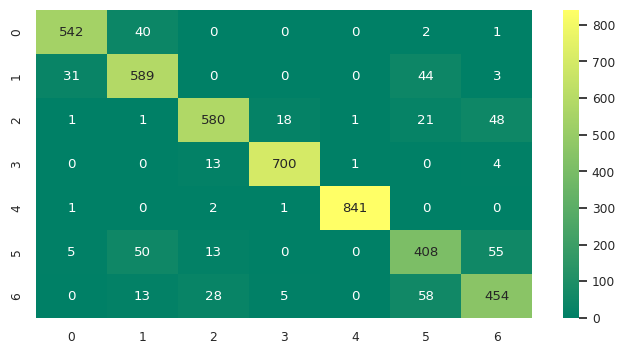

In [47]:
text = "XGBoostClassifer Optuna Tuning"
print(f"\n{text:^70}")
optunaXGBCustom = CustomModelling(
    
    model = xgb.XGBClassifier(**XGBOptunaBest, class_weight=class_weights, random_state=SEED,verbose=-1),
    x_train = x_train_opt,
    y_train = y_train_opt,
    x_test = None
)
model = optunaXGBCustom.train(optunaXGBCustom.x_train, optunaXGBCustom.y_train)
preds = optunaXGBCustom.inference(x_valid_opt)
accuracy, precision, recall, f1 = optunaXGBCustom.compute_scores(y_valid_opt, preds)
print("\n------------------------------------------------------------------------")
print(f"Accuracy on Validation Data is:", accuracy)
print(f"Precision:", precision)
print(f"Recall:", recall)
print(f"F1 Score:", f1)
optunaXGBCustom.classification_reports(y_valid_opt, preds)

<div style="background-color: #3498db; color: white; padding: 10px; font-size: 14px; font-weight: bold; text-align: center; border-radius: 10px;" style="background-color: #3498db; color: white; padding: 10px; font-size: 20px; font-weight: bold; text-align: center; border-radius: 10px;" id="532">5.3.2 Stratified KFold CV</div>

In [48]:
XGBBestParamsKaggle = {'tree_method': 'gpu_hist',
                    'gpu_id': 0,
                    'booster' : 'gbtree',
               "verbosity": 2,
                'objective': 'multi:softmax',
                'max_depth': 6, 
                'learning_rate': 0.07162985924323256, 
                'n_estimators': 520, 
                'gamma': 0.06356758410123971, 
                'min_child_weight': 2.561508074944465e-07, 
                'subsample': 0.7776045283087551, 
                'colsample_bytree': 0.7372395824120985, 
                'reg_alpha': 0.001847160785675701, 
                'reg_lambda': 0.6833206388751336, 
                'eval_metric': 'mlogloss'}

params = {'tree_method': 'gpu_hist',
                    'gpu_id': 0,
    'n_estimators': 1312,
    'learning_rate': 0.018279520260162645,
    'gamma': 0.0024196354156454324,
    'reg_alpha': 0.9025931173755949,
    'reg_lambda': 0.06835667255875388,
    'max_depth': 5,
    'min_child_weight': 5,
    'subsample': 0.883274050086088,
    'colsample_bytree': 0.6579828557036317
}



         XGBoostClassifer Stratified K-Fold CV on all dataset         


Stratified K-Fold:   0%|          | 0/10 [00:00<?, ?it/s]


------------------------------------------------------------------------
Mean Accuracy on Training Data: 0.9587116949436225
Mean Accuracy on Testing Data is: 0.9148629459140082
Mean Precision: 0.9147211832846122
Mean Recall: 0.9148629459140082
Mean F1 Score: 0.9146465761985192

------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2795
           1       0.88      0.90      0.89      3369
           2       0.90      0.90      0.90      3261
           3       0.97      0.97      0.97      3545
           4       1.00      1.00      1.00      4370
           5       0.83      0.79      0.81      2717
           6       0.83      0.84      0.83      2812

    accuracy                           0.91     22869
   macro avg       0.91      0.91      0.91     22869
weighted avg       0.91      0.91      0.91     22869


--------------------------

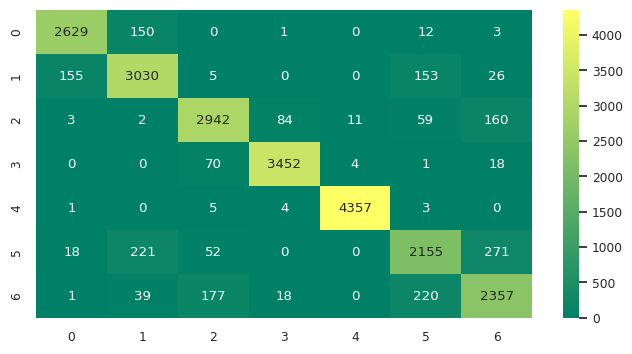

In [49]:
text = "XGBoostClassifer Stratified K-Fold CV on all dataset"
print(f"\n{text:^70}")
FinalXGBCustom = CustomModelling(
    
    model = xgb.XGBClassifier(**params, class_weight=class_weights, random_state=SEED,verbose=-1),
    x_train = x_train,
    y_train = y_train,
    x_test = x_test
)
stratifiedXGB_test_predictions = FinalXGBCustom.stratifiedKCV(splits=10, seed=SEED)

<div style="background-color: #3498db; color: white; padding: 10px; font-size: 16px; font-weight: bold; text-align: center; border-radius: 10px;" style="background-color: #3498db; color: white; padding: 10px; font-size: 20px; font-weight: bold; text-align: center; border-radius: 10px;" id="54">5.4 LGBMClassifier</div>


<div style="background-color: #3498db; color: white; padding: 10px; font-size: 14px; font-weight: bold; text-align: center; border-radius: 10px;" style="background-color: #3498db; color: white; padding: 10px; font-size: 20px; font-weight: bold; text-align: center; border-radius: 10px;" id="541">5.4.1 Optuna Tuning</div>


In [50]:
# def objective(trial):
#     params = {
#         'n_estimators' : trial.suggest_int('n_estimators',500,2000),
#         "max_depth":trial.suggest_int('max_depth',5,50),
#         "learning_rate" : trial.suggest_float('learning_rate',1e-4, 0.1, log=True),
#         "min_child_weight" : trial.suggest_float('min_child_weight', 0.5,4),
#         "min_child_samples" : trial.suggest_int('min_child_samples',1,250),
#         "subsample" : trial.suggest_float('subsample', 0.2, 1),
#         "subsample_freq" : trial.suggest_int('subsample_freq',0,5),
#         "colsample_bytree" : trial.suggest_float('colsample_bytree',0.2,1),
#         'num_leaves' : trial.suggest_int('num_leaves', 8, 64),
#     }
#     lgbmopt = LGBMClassifier(**params,random_state=seed,device="gpu",verbose=-1)
#     cv = cross_val_score(lgbmopt, x_train, y_train, cv = 4,scoring='accuracy').mean()
#     return cv

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100,timeout=2000)
# print(study.best_trial.params)

In [51]:
LGBMClassifierOptunaBest = {
                  'max_depth': 15,
                    'n_estimators' :520,
                  'learning_rate': 0.012581445996445997, 
                  'min_child_weight': 1.8172231887139634, 
                  'min_child_samples': 173, 
                  'subsample': 0.5302941162865715, 
                  'subsample_freq': 3, 
                  'colsample_bytree': 0.6074110342114967, 
                  'num_leaves': 32
                 }




                     LGBMClassifier Optuna Tuning                     

------------------------------------------------------------------------
Accuracy on Validation Data is: 0.9027109750765194
Precision: 0.9033146817899376
Recall: 0.9027109750765194
F1 Score: 0.902879363136832

------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       585
           1       0.86      0.88      0.87       667
           2       0.92      0.87      0.89       670
           3       0.97      0.97      0.97       718
           4       1.00      1.00      1.00       845
           5       0.77      0.78      0.78       531
           6       0.81      0.82      0.81       558

    accuracy                           0.90      4574
   macro avg       0.89      0.89      0.89      4574
weighted avg       0.90      0.90      0.90      4574


-----------------------

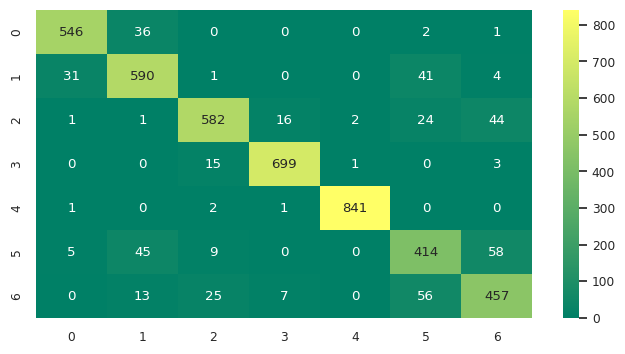

In [52]:
text = "LGBMClassifier Optuna Tuning"
print(f"\n{text:^70}")
optunaLGBMustom = CustomModelling(
    
    model = LGBMClassifier(**LGBMClassifierOptunaBest, class_weight=class_weights, random_state=SEED,verbose=-1),
    x_train = x_train_opt,
    y_train = y_train_opt,
    x_test = None
)
model = optunaLGBMustom.train(optunaLGBMustom.x_train, optunaLGBMustom.y_train)
preds = optunaLGBMustom.inference(x_valid_opt)
accuracy, precision, recall, f1 = optunaLGBMustom.compute_scores(y_valid_opt, preds)
print("\n------------------------------------------------------------------------")
print(f"Accuracy on Validation Data is:", accuracy)
print(f"Precision:", precision)
print(f"Recall:", recall)
print(f"F1 Score:", f1)
optunaLGBMustom.classification_reports(y_valid_opt, preds)

<div style="background-color: #3498db; color: white; padding: 10px; font-size: 14px; font-weight: bold; text-align: center; border-radius: 10px;" style="background-color: #3498db; color: white; padding: 10px; font-size: 20px; font-weight: bold; text-align: center; border-radius: 10px;" id="542">5.4.2 Stratified KFold CV</div>

In [53]:
LGBMClassifierParamsKaggle = {
    "objective": "multiclass",          # Objective function for the model
    "metric": "multi_logloss",          # Evaluation metric
    "boosting_type": "gbdt",            # Gradient boosting type       
    "num_class": 7,                     # Number of classes in the dataset
    'learning_rate': 0.030962211546832760,  # Learning rate for gradient boosting
    'n_estimators': 500,                # Number of boosting iterations
    'lambda_l1': 0.009667446568254372,  # L1 regularization term
    'lambda_l2': 0.04018641437301800,   # L2 regularization term
    'max_depth': 10,                    # Maximum depth of the trees
    'colsample_bytree': 0.40977129346872643,  # Fraction of features to consider for each tree
    'subsample': 0.9535797422450176,    # Fraction of samples to consider for each boosting iteration
    'min_child_samples': 26,             # Minimum number of data needed in a leaf
}


lgbm_params = {
    "objective": "multiclass",
    "metric": "multi_logloss",
    "boosting_type": "gbdt",
    "num_class": 7,
    'learning_rate': 0.031,
    'n_estimators': 550,
    'lambda_l1': 0.010,
    'lambda_l2': 0.040,
    'max_depth': 20,
    'colsample_bytree': 0.413,
    'subsample': 0.97,
    'min_child_samples': 25,   
    'class_weight':'balanced',
    
}

lgbm_params_ova = {
    "objective": "multiclass_ova",
    "metric": "multi_logloss",
    "boosting_type": "gbdt",
    "num_class": 7,
    'learning_rate': 0.031,
    'n_estimators': 550,
    'lambda_l1': 0.010,
    'lambda_l2': 0.040,
    'max_depth': 20,
    'colsample_bytree': 0.413,
    'subsample': 0.97,
    'min_child_samples': 25,   
    'class_weight':'balanced',
}


          LGBMClassifer Stratified K-Fold CV on all dataset           


Stratified K-Fold:   0%|          | 0/10 [00:00<?, ?it/s]


------------------------------------------------------------------------
Mean Accuracy on Training Data: 0.9941696899579002
Mean Accuracy on Testing Data is: 0.9136822643562208
Mean Precision: 0.9138479090208399
Mean Recall: 0.9136822643562208
Mean F1 Score: 0.9136389595193112

------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      2795
           1       0.88      0.89      0.89      3369
           2       0.91      0.90      0.90      3261
           3       0.97      0.97      0.97      3545
           4       1.00      1.00      1.00      4370
           5       0.82      0.80      0.81      2717
           6       0.83      0.84      0.83      2812

    accuracy                           0.91     22869
   macro avg       0.91      0.91      0.91     22869
weighted avg       0.91      0.91      0.91     22869


--------------------------

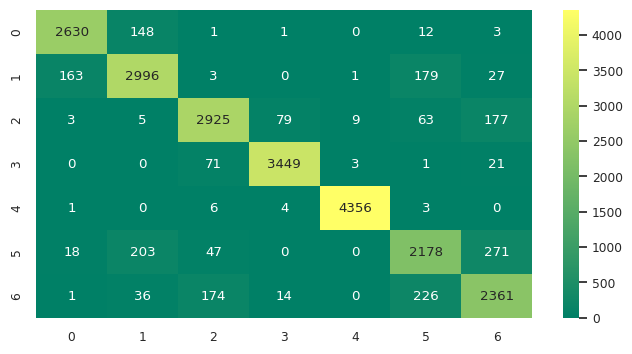

In [54]:
text = "LGBMClassifer Stratified K-Fold CV on all dataset"
print(f"\n{text:^70}")
FinalLGBMCustom = CustomModelling(
    
    model = LGBMClassifier(**lgbm_params, random_state=SEED, verbose=-1),
    x_train = x_train,
    y_train = y_train,
    x_test = x_test
)
stratifiedLGBM_test_predictions = FinalLGBMCustom.stratifiedKCV(splits=10, seed=SEED)

### Notes:
#### 1. **Balanced class weights** gave us better results on test data. Further investigate the obtained class_weights from sklearn

<div style="background-color: #3498db; color: white; padding: 10px; font-size: 16px; font-weight: bold; text-align: center; border-radius: 10px;" style="background-color: #3498db; color: white; padding: 10px; font-size: 20px; font-weight: bold; text-align: center; border-radius: 10px;" style="background-color: #3498db; color: white; padding: 10px; font-size: 20px; font-weight: bold; text-align: center; border-radius: 10px;" id="55">5.5 CatBoost</div>

<div style="background-color: #3498db; color: white; padding: 10px; font-size: 14px; font-weight: bold; text-align: center; border-radius: 10px;" style="background-color: #3498db; color: white; padding: 10px; font-size: 20px; font-weight: bold; text-align: center; border-radius: 10px;" id="551">5.5.1 Optuna Tuning</div>

In [55]:
# def objective(trial):
#     params = {
#         'iterations': 1000,  # High number of estimators
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
#         'depth': trial.suggest_int('depth', 3, 10),
#         'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.01, 10.0),
#         'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
#         'random_seed': RANDOM_SEED,
#         'verbose': False,
#         'task_type':"GPU"
#     }
#     catboostopt = CatBoostClassifier(**params,random_state=SEED,device="gpu",verbose=-1)
#     cv = cross_val_score(catboostopt, x_train, y_train, cv = 4,scoring='accuracy').mean()
#     return cv

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100,timeout=2000)
# print(study.best_trial.params)

In [56]:
CatBoostOptunaBest = {'learning_rate': 0.13762007048684638, 
                      'depth': 5, 
                      'l2_leaf_reg': 5.285199432056192, 
                      'bagging_temperature': 0.6029582154263095,
                         'random_seed': SEED,
                        'verbose': False,
                        'task_type':"GPU",
                         'iterations':1000
                     }



                        CatBoost Optuna Tuning                        

------------------------------------------------------------------------
Accuracy on Validation Data is: 0.8992129427197202
Precision: 0.8999652810220142
Recall: 0.8992129427197202
F1 Score: 0.8994370090567053

------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       585
           1       0.85      0.89      0.87       667
           2       0.91      0.87      0.89       670
           3       0.96      0.97      0.96       718
           4       1.00      1.00      1.00       845
           5       0.76      0.77      0.77       531
           6       0.80      0.82      0.81       558

    accuracy                           0.90      4574
   macro avg       0.89      0.89      0.89      4574
weighted avg       0.90      0.90      0.90      4574


----------------------

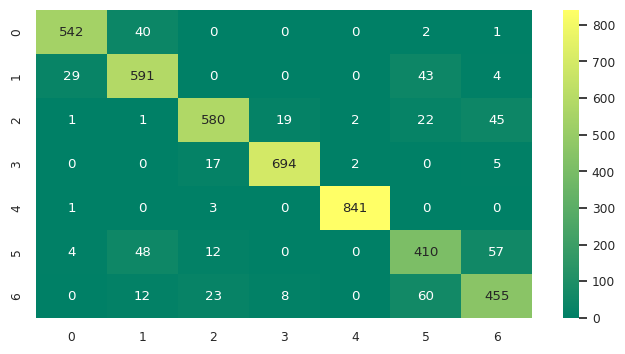

In [57]:
text = "CatBoost Optuna Tuning"
print(f"\n{text:^70}")
optunaCatBoostustom = CustomModelling(
    
    model = CatBoostClassifier(**CatBoostOptunaBest),
    x_train = x_train_opt,
    y_train = y_train_opt,
    x_test = None
)
model = optunaCatBoostustom.train(optunaCatBoostustom.x_train, optunaCatBoostustom.y_train)
preds = optunaCatBoostustom.inference(x_valid_opt)
accuracy, precision, recall, f1 = optunaCatBoostustom.compute_scores(y_valid_opt, preds)
print("\n------------------------------------------------------------------------")
print(f"Accuracy on Validation Data is:", accuracy)
print(f"Precision:", precision)
print(f"Recall:", recall)
print(f"F1 Score:", f1)
optunaCatBoostustom.classification_reports(y_valid_opt, preds)

<div style="background-color: #3498db; color: white; padding: 10px; font-size: 14px; font-weight: bold; text-align: center; border-radius: 10px;" style="background-color: #3498db; color: white; padding: 10px; font-size: 20px; font-weight: bold; text-align: center; border-radius: 10px;" id="552">5.5.2 Stratified KFold CV</div>

In [58]:
CatBoostKaggleBestParams = {'learning_rate': 0.07888619537213055, 
                      'iterations': 3739, 
                      'depth': 3, 
                      'colsample_bylevel': 0.8010997789736587, 
                      'l2_leaf_reg': 1.2548657941610322, 
                      'border_count': 226,
                            'random_seed': SEED,
                        'verbose': False,
#                             'task_type':"GPU",
                            'eval_metric':'Accuracy'
                           }


             CatBoost Stratified K-Fold CV on all dataset             


Stratified K-Fold:   0%|          | 0/5 [00:00<?, ?it/s]


------------------------------------------------------------------------
Mean Accuracy on Training Data: 0.954086319493249
Mean Accuracy on Testing Data is: 0.9109711944914214
Mean Precision: 0.9108921425735141
Mean Recall: 0.9109711944914214
Mean F1 Score: 0.9108474227087477

------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2795
           1       0.88      0.89      0.89      3369
           2       0.90      0.89      0.90      3261
           3       0.97      0.97      0.97      3545
           4       1.00      1.00      1.00      4370
           5       0.82      0.79      0.80      2717
           6       0.82      0.83      0.83      2812

    accuracy                           0.91     22869
   macro avg       0.90      0.90      0.90     22869
weighted avg       0.91      0.91      0.91     22869


---------------------------

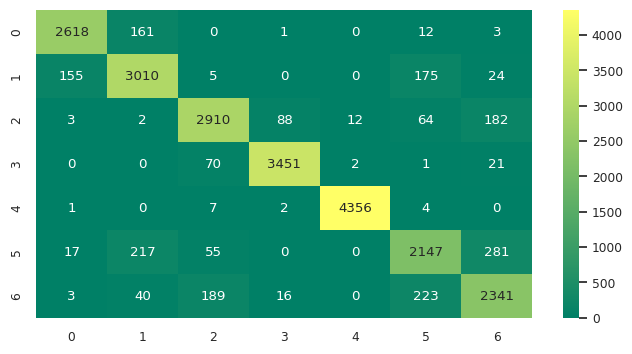

In [59]:
text = "CatBoost Stratified K-Fold CV on all dataset"
print(f"\n{text:^70}")
FinalCatBoostCustom = CustomModelling(
    
    model = CatBoostClassifier(**CatBoostKaggleBestParams),
    x_train = x_train,
    y_train = y_train,
    x_test = x_test
)
stratifiedCatBoost_test_predictions = FinalCatBoostCustom.stratifiedKCV(splits=5, seed=SEED, isCatBoost=True)

<div style="background-color: #3498db; color: white; padding: 10px; font-size: 16px; font-weight: bold; text-align: center; border-radius: 10px;" style="background-color: #3498db; color: white; padding: 10px; font-size: 20px; font-weight: bold; text-align: center; border-radius: 10px;" style="background-color: #3498db; color: white; padding: 10px; font-size: 20px; font-weight: bold; text-align: center; border-radius: 10px;" id="56">5.6 Ensembles</div>

<div style="background-color: #3498db; color: white; padding: 10px; font-size: 14px; font-weight: bold; text-align: center; border-radius: 10px;" style="background-color: #3498db; color: white; padding: 10px; font-size: 20px; font-weight: bold; text-align: center; border-radius: 10px;" style="background-color: #3498db; color: white; padding: 10px; font-size: 20px; font-weight: bold; text-align: center; border-radius: 10px;" id="561">5.6.1 Maximum Voting</div>

In [60]:
ensemble_model = VotingClassifier(
    estimators=[
        ('XGBoostOptuna', xgb.XGBClassifier(**XGBOptunaBest, class_weight=class_weights, random_state=SEED,verbose=-1)),
        ('XGBoostKaggleBest', xgb.XGBClassifier(**XGBBestParamsKaggle, class_weight=class_weights, random_state=SEED,verbose=-1)),
        ('LGBMOptuna', LGBMClassifier(**LGBMClassifierOptunaBest, class_weight=class_weights, random_state=SEED,verbose=-1)),
        ('LGBMKaggleBest', LGBMClassifier(**LGBMClassifierParamsKaggle, class_weight=class_weights, random_state=SEED,verbose=-1)),
        ('LGBMKaggleBest2', LGBMClassifier(**lgbm_params, random_state=SEED,verbose=-1)),
        ('GaussianNB', GaussianNB()),
        ('KNN', KNeighborsClassifier())
    ],
    voting='soft',
    flatten_transform=True
)


Ensemble Model Maximum Soft Voting Stratified K-Fold CV on all dataset


Stratified K-Fold:   0%|          | 0/10 [00:00<?, ?it/s]


------------------------------------------------------------------------
Mean Accuracy on Training Data: 0.9754155326182128
Mean Accuracy on Testing Data is: 0.915081534681361
Mean Precision: 0.9150609833754814
Mean Recall: 0.915081534681361
Mean F1 Score: 0.9148711381591283

------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2795
           1       0.89      0.89      0.89      3369
           2       0.91      0.90      0.90      3261
           3       0.97      0.98      0.97      3545
           4       1.00      1.00      1.00      4370
           5       0.83      0.79      0.81      2717
           6       0.82      0.85      0.84      2812

    accuracy                           0.92     22869
   macro avg       0.91      0.91      0.91     22869
weighted avg       0.91      0.92      0.91     22869


----------------------------

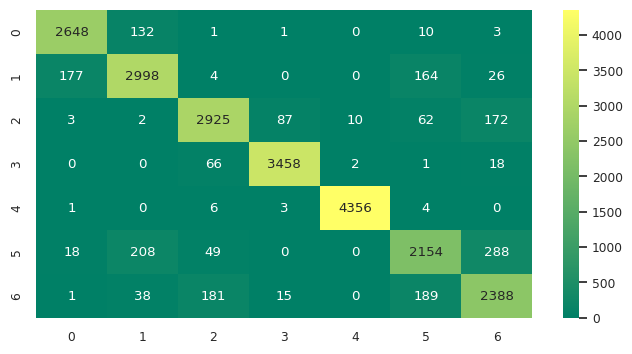

In [61]:
text = "Ensemble Model Maximum Soft Voting Stratified K-Fold CV on all dataset"
print(f"\n{text:^70}")
FinalEnseSoftMVCustom = CustomModelling(
    
    model = ensemble_model,
    x_train = x_train,
    y_train = y_train,
    x_test = x_test
)
stratifiedEnseSoftMV_test_predictions = FinalEnseSoftMVCustom.stratifiedKCV(splits=10, seed=SEED)


Ensemble Model Maximum Hard Voting Stratified K-Fold CV on all dataset


Stratified K-Fold:   0%|          | 0/10 [00:00<?, ?it/s]


------------------------------------------------------------------------
Mean Accuracy on Training Data: 0.9927801335790122
Mean Accuracy on Testing Data is: 0.9139883613149143
Mean Precision: 0.9139096717731648
Mean Recall: 0.9139883613149143
Mean F1 Score: 0.9138172503714918

------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      2795
           1       0.88      0.89      0.89      3369
           2       0.90      0.90      0.90      3261
           3       0.97      0.97      0.97      3545
           4       1.00      1.00      1.00      4370
           5       0.82      0.80      0.81      2717
           6       0.84      0.83      0.83      2812

    accuracy                           0.91     22869
   macro avg       0.91      0.91      0.91     22869
weighted avg       0.91      0.91      0.91     22869


--------------------------

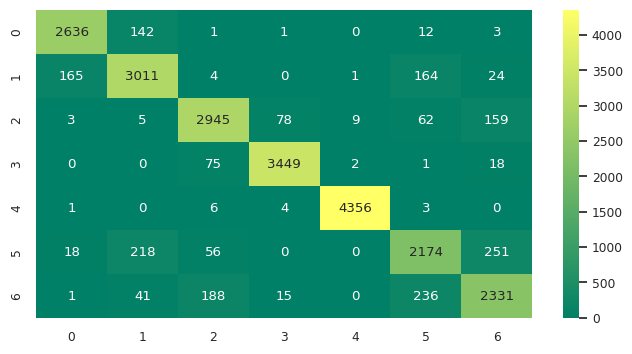

CPU times: user 29min 24s, sys: 24.1 s, total: 29min 48s
Wall time: 18min 35s


In [62]:
%%time
hard_ensemble_model = VotingClassifier(
    estimators=[
        ('XGBoostKaggleBest2', xgb.XGBClassifier(**params, class_weight=class_weights, random_state=SEED,verbose=-1)),
        ('XGBoostKaggleBest', xgb.XGBClassifier(**XGBBestParamsKaggle, class_weight=class_weights, random_state=SEED,verbose=-1)),
        ('LGBMKaggleBest', LGBMClassifier(**LGBMClassifierParamsKaggle, class_weight=class_weights, random_state=SEED,verbose=-1)),
        ('LGBMKaggleBest2', LGBMClassifier(**lgbm_params, random_state=SEED,verbose=-1)),
    ],
    voting='hard',
    flatten_transform=True
)



text = "Ensemble Model Maximum Hard Voting Stratified K-Fold CV on all dataset"
print(f"\n{text:^70}")
FinalEnseHardMVCustom = CustomModelling(
    
    model = hard_ensemble_model,
    x_train = x_train,
    y_train = y_train,
    x_test = x_test
)
stratifiedEnseHardMV_test_predictions = FinalEnseHardMVCustom.stratifiedKCV(splits=10, seed=SEED)


Ensemble Model Maximum Hard Voting Stratified K-Fold CV on all dataset


Stratified K-Fold:   0%|          | 0/10 [00:00<?, ?it/s]


------------------------------------------------------------------------
Mean Accuracy on Training Data: 0.9941502557366573
Mean Accuracy on Testing Data is: 0.9140758121238344
Mean Precision: 0.9141711116407908
Mean Recall: 0.9140758121238344
Mean F1 Score: 0.9139957380289848

------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      2795
           1       0.88      0.89      0.89      3369
           2       0.91      0.90      0.90      3261
           3       0.97      0.97      0.97      3545
           4       1.00      1.00      1.00      4370
           5       0.82      0.80      0.81      2717
           6       0.83      0.84      0.83      2812

    accuracy                           0.91     22869
   macro avg       0.91      0.91      0.91     22869
weighted avg       0.91      0.91      0.91     22869


--------------------------

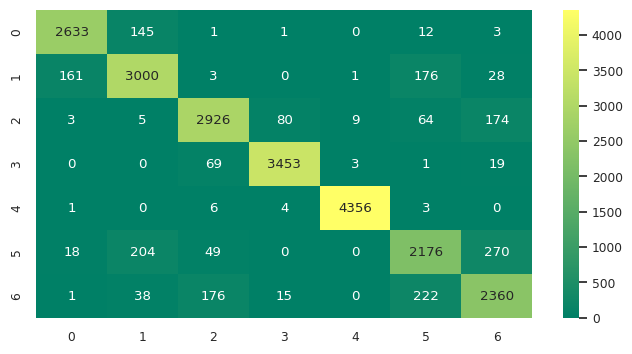

CPU times: user 29min 32s, sys: 24.1 s, total: 29min 56s
Wall time: 18min 40s


In [63]:
%%time
hard_ensemble_model = VotingClassifier(
    estimators=[
        ('XGBoostKaggleBest2', xgb.XGBClassifier(**params, class_weight=class_weights, random_state=SEED,verbose=-1)),
        ('XGBoostKaggleBest', xgb.XGBClassifier(**XGBBestParamsKaggle, class_weight=class_weights, random_state=SEED,verbose=-1)),
        ('LGBMKaggleBest', LGBMClassifier(**LGBMClassifierParamsKaggle, class_weight=class_weights, random_state=SEED,verbose=-1)),
        ('LGBMKaggleBest2', LGBMClassifier(**lgbm_params, random_state=SEED,verbose=-1)),
    ],
    voting='hard',
    flatten_transform=True,
    weights=[1,2,1,3]
)



text = "Ensemble Model Maximum Hard Voting Stratified K-Fold CV on all dataset"
print(f"\n{text:^70}")
FinalEnseHardMVCustom = CustomModelling(
    
    model = hard_ensemble_model,
    x_train = x_train,
    y_train = y_train,
    x_test = x_test
)
stratifiedEnseHardMV_test_predictions = FinalEnseHardMVCustom.stratifiedKCV(splits=10, seed=SEED)

<div style="background-color: #3498db; color: white; padding: 10px; font-size: 14px; font-weight: bold; text-align: center; border-radius: 10px;" style="background-color: #3498db; color: white; padding: 10px; font-size: 20px; font-weight: bold; text-align: center; border-radius: 10px;" style="background-color: #3498db; color: white; padding: 10px; font-size: 20px; font-weight: bold; text-align: center; border-radius: 10px;" id="562">5.6.2 Meta-Stacking</div>


       Meta-Stacking Model Stratified K-Fold CV on all dataset        


Stratified K-Fold:   0%|          | 0/10 [00:00<?, ?it/s]


------------------------------------------------------------------------
Mean Accuracy on Training Data: 0.9673454282828041
Mean Accuracy on Testing Data is: 0.9127640882449816
Mean Precision: 0.9130337691172082
Mean Recall: 0.9127640882449816
Mean F1 Score: 0.9126825741088684

------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      2795
           1       0.88      0.89      0.89      3369
           2       0.90      0.89      0.90      3261
           3       0.97      0.97      0.97      3545
           4       1.00      1.00      1.00      4370
           5       0.83      0.79      0.81      2717
           6       0.81      0.85      0.83      2812

    accuracy                           0.91     22869
   macro avg       0.90      0.90      0.90     22869
weighted avg       0.91      0.91      0.91     22869


--------------------------

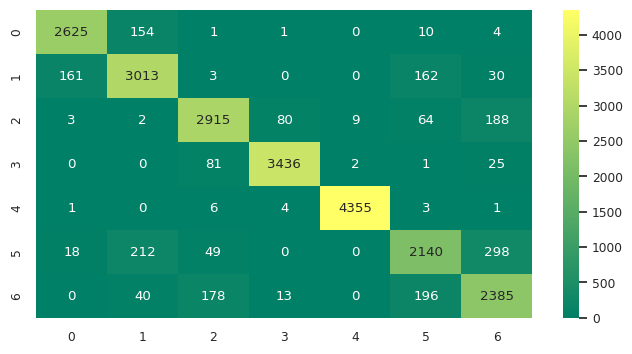

CPU times: user 3h 12min 26s, sys: 3min 27s, total: 3h 15min 54s
Wall time: 1h 57min 35s


In [64]:
%%time
from sklearn.ensemble import StackingClassifier

estimators=[
        ('XGBoostOptuna', xgb.XGBClassifier(**XGBOptunaBest, class_weight=class_weights, random_state=SEED,verbose=-1)),
        ('XGBoostKaggleBest', xgb.XGBClassifier(**XGBBestParamsKaggle, class_weight=class_weights, random_state=SEED,verbose=-1)),
        ('LGBMOptuna', LGBMClassifier(**LGBMClassifierOptunaBest, class_weight=class_weights, random_state=SEED,verbose=-1)),
        ('LGBMKaggleBest', LGBMClassifier(**LGBMClassifierParamsKaggle, class_weight=class_weights, random_state=SEED,verbose=-1)),
        ('LGBMKaggleBest2', LGBMClassifier(**lgbm_params, random_state=SEED,verbose=-1))
    ]


meta_stacking_model = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier(**lgbm_params, random_state=SEED,verbose=-1))
text = "Meta-Stacking Model Stratified K-Fold CV on all dataset"
print(f"\n{text:^70}")
FinalEnseHardMVCustom = CustomModelling(
    
    model = meta_stacking_model,
    x_train = x_train,
    y_train = y_train,
    x_test = x_test
)
stratifiedMetaStacking_test_predictions = FinalEnseHardMVCustom.stratifiedKCV(splits=10, seed=SEED)


       Meta-Stacking Model Stratified K-Fold CV on all dataset        


Stratified K-Fold:   0%|          | 0/10 [00:00<?, ?it/s]


------------------------------------------------------------------------
Mean Accuracy on Training Data: 0.9937178435468403
Mean Accuracy on Testing Data is: 0.9134636182064474
Mean Precision: 0.9135375000471647
Mean Recall: 0.9134636182064474
Mean F1 Score: 0.9133947366233613

------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2795
           1       0.88      0.89      0.89      3369
           2       0.90      0.90      0.90      3261
           3       0.97      0.97      0.97      3545
           4       1.00      1.00      1.00      4370
           5       0.82      0.80      0.81      2717
           6       0.83      0.84      0.83      2812

    accuracy                           0.91     22869
   macro avg       0.91      0.91      0.91     22869
weighted avg       0.91      0.91      0.91     22869


--------------------------

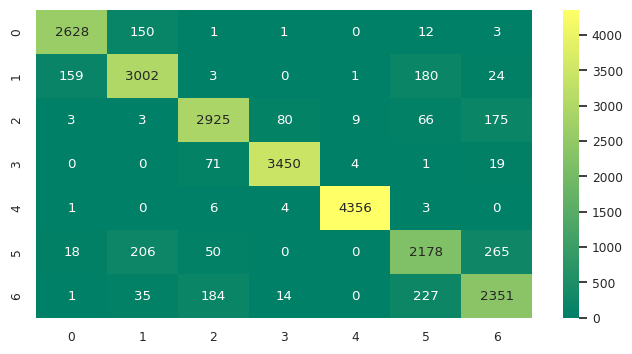

CPU times: user 1h 47min 30s, sys: 2min 54s, total: 1h 50min 25s
Wall time: 1h 1min 41s


In [65]:
%%time
from sklearn.linear_model import LogisticRegression

estimators=[
        ('XGBoostKaggleBest', xgb.XGBClassifier(**XGBBestParamsKaggle, class_weight=class_weights, random_state=SEED,verbose=-1)),
        ('LGBMKaggleBest', LGBMClassifier(**LGBMClassifierParamsKaggle, class_weight=class_weights, random_state=SEED,verbose=-1)),
        ('LGBMKaggleBest2', LGBMClassifier(**lgbm_params, random_state=SEED,verbose=-1))
    ]


meta_stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(random_state=SEED))
text = "Meta-Stacking Model Stratified K-Fold CV on all dataset"
print(f"\n{text:^70}")
FinalEnseHardMVCustom = CustomModelling(
    
    model = meta_stacking_model,
    x_train = x_train,
    y_train = y_train,
    x_test = x_test
)
stratifiedStackingLogReg_test_predictions = FinalEnseHardMVCustom.stratifiedKCV(splits=10, seed=SEED)

<div style="background-color: #3498db; color: white; padding: 10px; font-size: 20px; font-weight: bold; text-align: center; border-radius: 10px;" style="background-color: #3498db; color: white; padding: 10px; font-size: 20px; font-weight: bold; text-align: center; border-radius: 10px;" style="background-color: #3498db; color: white; padding: 20px; font-size: 30px; font-weight: bold; text-align: center; border-radius: 10px;" id="6">6. Submission</div>

[back to top](#0)


<div style="background-color: #ff9933; color: white; padding: 10px; font-size: 17px; font-weight: bold; text-align: center; border-radius: 10px;" style="background-color: #3498db; color: white; padding: 10px; font-size: 20px; font-weight: bold; text-align: center; border-radius: 10px;" style="background-color: #3498db; color: white; padding: 20px; font-size: 30px; font-weight: bold; text-align: center; border-radius: 10px;" id="61">Best submission model</div>


            Best Model Stratified K-Fold CV on all dataset            


Stratified K-Fold:   0%|          | 0/10 [00:00<?, ?it/s]


------------------------------------------------------------------------
Mean Accuracy on Training Data: 0.9915606279932863
Mean Accuracy on Testing Data is: 0.9144257109968817
Mean Precision: 0.9144381079914552
Mean Recall: 0.9144257109968817
Mean F1 Score: 0.914283391478242

------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2795
           1       0.88      0.90      0.89      3369
           2       0.90      0.90      0.90      3261
           3       0.97      0.97      0.97      3545
           4       1.00      1.00      1.00      4370
           5       0.83      0.80      0.81      2717
           6       0.83      0.84      0.83      2812

    accuracy                           0.91     22869
   macro avg       0.91      0.91      0.91     22869
weighted avg       0.91      0.91      0.91     22869


---------------------------

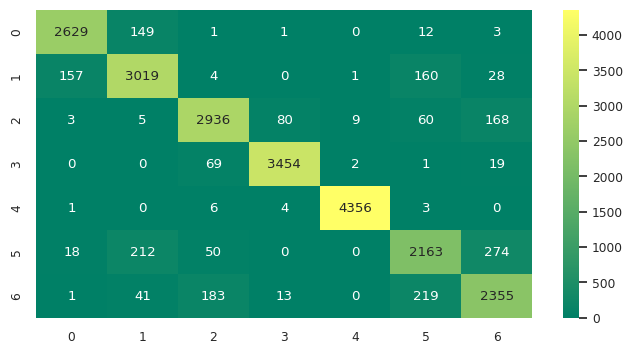

In [66]:
text = "Best Model Stratified K-Fold CV on all dataset"
print(f"\n{text:^70}")
FinalLGBMCustom = CustomModelling(
    
    model = LGBMClassifier(**LGBMClassifierParamsKaggle, random_state=SEED, verbose=-1),
    x_train = x_train,
    y_train = y_train,
    x_test = x_test
)
stratifiedLGBM_test_predictions = FinalLGBMCustom.stratifiedKCV(splits=10, seed=SEED)

After experimenting with many architectures (ensembles and non-ones), I found that no model could get higher performance in Normal_weight, Overweight_Level_I and II (watch F1-scores and confusion matrices). These three classes' distributions also frequently overlap one another, and our dataset shows that their observations are comparable. As you could see in the above Confusion Matrix (1, 5 and 6 are Normal_weight, Overweight_Level_I and II, respectively), the models confuse these 3 categories with each other. I have used a lot of feature engineering, but I haven't been able to identify a wise cut-off point for these three classes to diverge.

In order to modify the test predictions from the first model, I experimented with my best model and further trained it on observations whose classes had lower F1 scores (e.g., Normal-Overweight 1-2, Normal-Overweight 1-2-Obesity 1, etc.). However, it did not perform any better.

<div style="background-color: #ff9933; color: white; padding: 10px; font-size: 17px; font-weight: bold; text-align: center; border-radius: 10px;" style="background-color: #3498db; color: white; padding: 10px; font-size: 20px; font-weight: bold; text-align: center; border-radius: 10px;" style="background-color: #3498db; color: white; padding: 20px; font-size: 30px; font-weight: bold; text-align: center; border-radius: 10px;" id="62">FI & SHAP values for Best Model</div>

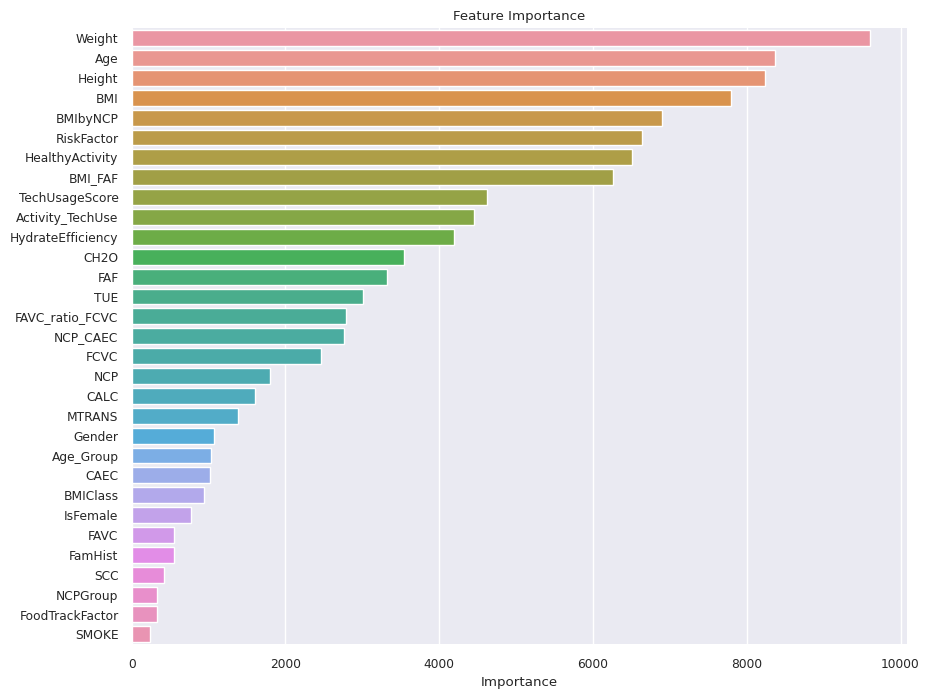

In [67]:
# feature importances
feature_importance = FinalLGBMCustom.model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

In [68]:
%%capture
import shap

explainer = shap.TreeExplainer(FinalLGBMCustom.model)
shap_values = explainer.shap_values(x_train)

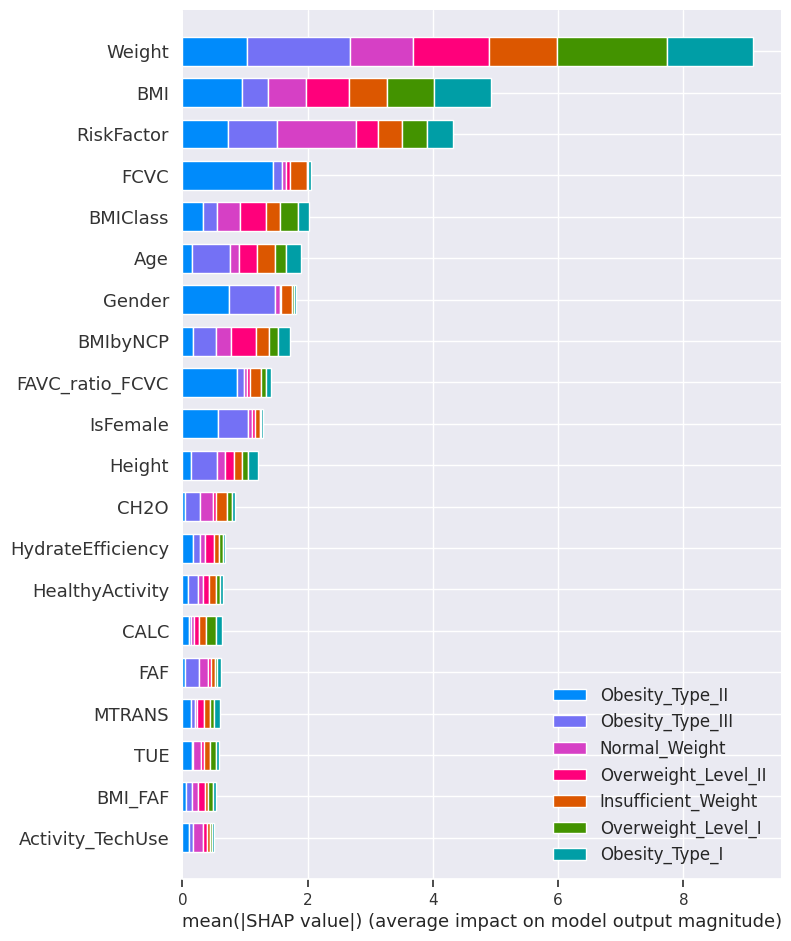

In [69]:
a = shap.summary_plot(shap_values, x_train, class_names=list(full_train['NObeyesdad'].unique()))


           Best Model Stratified K-Fold CV on Top Features            


Stratified K-Fold:   0%|          | 0/10 [00:00<?, ?it/s]


------------------------------------------------------------------------
Mean Accuracy on Training Data: 0.987605734346095
Mean Accuracy on Testing Data is: 0.9079979043940016
Mean Precision: 0.9080570760641908
Mean Recall: 0.9079979043940016
Mean F1 Score: 0.9079062188289295

------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2795
           1       0.88      0.89      0.89      3369
           2       0.89      0.88      0.89      3261
           3       0.97      0.97      0.97      3545
           4       0.99      0.99      0.99      4370
           5       0.81      0.79      0.80      2717
           6       0.82      0.83      0.82      2812

    accuracy                           0.91     22869
   macro avg       0.90      0.90      0.90     22869
weighted avg       0.91      0.91      0.91     22869


---------------------------

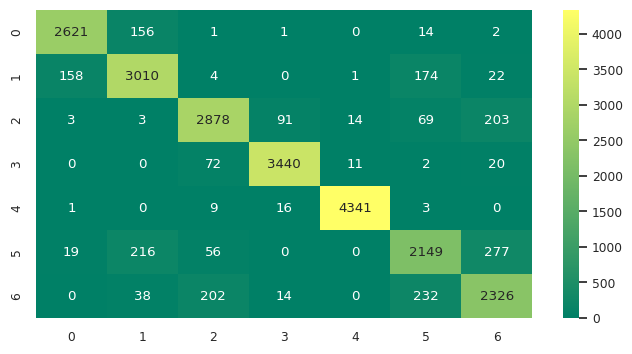

In [70]:
text = "Best Model Stratified K-Fold CV on Top Features"
top_features = ['Weight', 'BMI', 'RiskFactor', 'FCVC', 'BMIClass', 'Age', 'Gender', 'BMIbyNCP', 'FAVC_ratio_FCVC', 'IsFemale', 'Height', 'CH2O', 'HydrateEfficiency', 'HealthyActivity',
               'BMI_FAF', 'Activity_TechUse']
top_fimportance_list = feature_importance_df[feature_importance_df.Importance>2000].Feature.to_list()
print(f"\n{text:^70}")
FinalLGBMCustom = CustomModelling(
    
    model = LGBMClassifier(**LGBMClassifierParamsKaggle, random_state=SEED, verbose=-1),
    x_train = x_train[top_fimportance_list],
    y_train = y_train,
    x_test = x_test[top_fimportance_list]
)
topFeaturesLGBM_test_predictions = FinalLGBMCustom.stratifiedKCV(splits=10, seed=SEED)

### Notes:
Training the best model on both, top features obtained from Feature Importance and Shapley, did not outperform current model. To determine which of our features should be dropped, more research should be conducted. We could try dropping 1 column at a time, starting from the lowest ones in Shapley's scores.

<div style="background-color: #ff9933; color: white; padding: 10px; font-size: 17px; font-weight: bold; text-align: center; border-radius: 10px;" style="background-color: #3498db; color: white; padding: 10px; font-size: 20px; font-weight: bold; text-align: center; border-radius: 10px;" style="background-color: #3498db; color: white; padding: 20px; font-size: 30px; font-weight: bold; text-align: center; border-radius: 10px;" id="63">Submit</div>

In [71]:
stratifiedLGBM_test_predictions.astype(np.uint8)

0        3
1        5
2        4
3        2
4        4
        ..
13835    6
13836    1
13837    0
13838    1
13839    3
Name: 0, Length: 13840, dtype: uint8

In [72]:
le.inverse_transform(stratifiedLGBM_test_predictions.astype(np.uint8))

array(['Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_III', ...,
       'Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_II'],
      dtype=object)

In [73]:
predictions=le.inverse_transform(stratifiedLGBM_test_predictions.astype(np.uint8))
predictions

array(['Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_III', ...,
       'Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_II'],
      dtype=object)

In [74]:
test_ids

0        20758
1        20759
2        20760
3        20761
4        20762
         ...  
13835    34593
13836    34594
13837    34595
13838    34596
13839    34597
Name: id, Length: 13840, dtype: int64

In [75]:
submission = pd.DataFrame({
    'id': test_ids,
    'NObeyesdad': predictions
})


In [76]:
submission

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Normal_Weight
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [77]:
submission.to_csv('BestSubmissionFeatureImportance.csv', index=False)